In [3]:
#Import useful libraries
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns 
sns.set(style="darkgrid") 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import linear_model
import scipy.stats as stat


In [4]:
#Data importation
data = pd.read_csv('ECL_Data.csv',encoding = "utf_8", header = 'infer')
print('Records:', data.shape[0], '\nColumns:', data.shape[1])
data.head()

Records: 436781 
Columns: 156


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,PD,EAD,LGD,EL,CCF
0,66310712,NaN,35000,35000,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,NaN,NaN,NaN,0.024112,27709.44716,0.881411,588.896553,0.791698
1,68356421,NaN,22400,22400,22400.0,60 months,12.88,508.30,C,C2,...,NaN,NaN,NaN,NaN,NaN,0.019849,16887.98481,0.873206,292.712118,0.753928
2,68426545,NaN,16000,16000,16000.0,60 months,12.88,363.07,C,C2,...,NaN,NaN,NaN,NaN,NaN,0.028790,12053.69154,0.879739,305.287922,0.753356
3,68506798,NaN,23000,23000,23000.0,60 months,8.49,471.77,B,B1,...,NaN,NaN,NaN,NaN,NaN,0.014345,15551.09045,0.893354,199.286413,0.676134
4,68537655,NaN,16800,16800,16800.0,60 months,12.88,381.23,C,C2,...,NaN,NaN,NaN,NaN,NaN,0.025736,12563.00730,0.866387,280.123456,0.747798


In [5]:
pd.options.display.max_rows = 4000

In [115]:
#inspecting variable data types in imported dataframe
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436781 entries, 0 to 436780
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   funded_amnt          436781 non-null  int64  
 1   term                 436781 non-null  object 
 2   int_rate             436781 non-null  float64
 3   installment          436781 non-null  float64
 4   grade                436781 non-null  object 
 5   emp_length           436781 non-null  object 
 6   home_ownership       436781 non-null  object 
 7   annual_inc           436781 non-null  float64
 8   verification_status  436781 non-null  object 
 9   issue_d              436781 non-null  object 
 10  loan_status          436781 non-null  object 
 11  purpose              436781 non-null  object 
 12  addr_state           436781 non-null  object 
 13  dti                  436781 non-null  float64
 14  earliest_cr_line     436781 non-null  object 
 15  fico_range_low   

In [7]:
#Checking the total number of rows and columns
data.shape

(436781, 156)

In [8]:
#Drop columns not required for analysis
data = data.drop(columns=['member_id',
'funded_amnt_inv',
'sub_grade',
'emp_title',
'pymnt_plan',
'url',
'desc',
'title',
'zip_code',
'revol_bal',
'revol_util',
'total_acc',
'out_prncp_inv',
'total_pymnt',
'total_pymnt_inv',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'collection_recovery_fee',
'last_pymnt_d',
'last_pymnt_amnt',
'next_pymnt_d',
'last_credit_pull_d',
'last_fico_range_high',
'last_fico_range_low',
'collections_12_mths_ex_med',
'mths_since_last_major_derog',
'policy_code',
'application_type',
'annual_inc_joint',
'dti_joint',
'verification_status_joint',
'tot_coll_amt',
'open_acc_6m',
'open_act_il',
'open_il_12m',
'open_il_24m',
'total_bal_il',
'il_util',
'open_rv_12m',
'open_rv_24m',
'max_bal_bc',
'all_util',
'total_rev_hi_lim',
'inq_fi',
'total_cu_tl',
'inq_last_12m',
'acc_open_past_24mths',
'avg_cur_bal',
'bc_open_to_buy',
'bc_util',
'chargeoff_within_12_mths',
'mo_sin_old_il_acct',
'mo_sin_old_rev_tl_op',
'mo_sin_rcnt_rev_tl_op',
'mo_sin_rcnt_tl',
'mort_acc',
'mths_since_recent_bc',
'mths_since_recent_bc_dlq',
'mths_since_recent_inq',
'mths_since_recent_revol_delinq',
'num_accts_ever_120_pd',
'num_actv_bc_tl',
'num_actv_rev_tl',
'num_bc_sats',
'num_bc_tl',
'num_il_tl',
'num_op_rev_tl',
'num_rev_accts',
'num_rev_tl_bal_gt_0',
'num_sats',
'num_tl_120dpd_2m',
'num_tl_30dpd',
'num_tl_90g_dpd_24m',
'num_tl_op_past_12m',
'pct_tl_nvr_dlq',
'percent_bc_gt_75',
'pub_rec_bankruptcies',
'tax_liens',
'tot_hi_cred_lim',
'total_bal_ex_mort',
'total_bc_limit',
'total_il_high_credit_limit',
'revol_bal_joint',
'sec_app_fico_range_low',
'sec_app_fico_range_high',
'sec_app_earliest_cr_line',
'sec_app_inq_last_6mths',
'sec_app_mort_acc',
'sec_app_open_acc',
'sec_app_revol_util',
'sec_app_open_act_il',
'sec_app_num_rev_accts',
'sec_app_chargeoff_within_12_mths',
'sec_app_collections_12_mths_ex_med',
'sec_app_mths_since_last_major_derog',
'hardship_type',
'hardship_reason',
'hardship_status',
'deferral_term',
'hardship_amount',
'hardship_start_date',
'hardship_end_date',
'payment_plan_start_date',
'hardship_length',
'hardship_dpd',
'hardship_loan_status',
'orig_projected_additional_accrued_interest',
'hardship_payoff_balance_amount',
'hardship_last_payment_amount',
'disbursement_method',
'debt_settlement_flag',
'debt_settlement_flag_date',
'settlement_status',
'settlement_date',
'settlement_amount',
'settlement_percentage',
'settlement_term',
'delinq_2yrs',
'tot_cur_bal',
'mths_since_rcnt_il',  
'PD',
'LGD',
'EAD',
'CCF',
'recoveries',
'id','loan_amnt', 'hardship_flag'])

In [9]:
data.head()

,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,initial_list_status,out_prncp,acc_now_delinq,delinq_amnt,EL
0,35000,60 months,14.85,829.90,C,10+ years,MORTGAGE,110000.0,Source Verified,Dec-15,...,0,NaN,NaN,13,0,w,15897.65,0,0,588.896553
1,22400,60 months,12.88,508.30,C,6 years,MORTGAGE,95000.0,Not Verified,Dec-15,...,0,54.0,NaN,16,0,w,9912.88,0,0,292.712118
2,16000,60 months,12.88,363.07,C,1 year,MORTGAGE,70000.0,Not Verified,Dec-15,...,0,NaN,NaN,13,0,w,7080.70,0,0,305.287922
3,23000,60 months,8.49,471.77,B,5 years,RENT,64000.0,Not Verified,Dec-15,...,0,29.0,NaN,21,0,w,9580.20,0,0,199.286413
4,16800,60 months,12.88,381.23,C,10+ years,MORTGAGE,118000.0,Not Verified,Dec-15,...,0,35.0,57.0,11,1,w,7434.43,0,0,280.123456


In [10]:
data.shape

(436781, 27)

In [11]:
data.describe()

,funded_amnt,int_rate,installment,annual_inc,dti,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,out_prncp,acc_now_delinq,delinq_amnt,EL
count,436781.000000,436781.000000,436781.000000,4.367810e+05,436143.000000,436781.000000,436781.000000,436781.000000,208834.000000,61617.000000,436781.000000,436781.000000,436781.000000,436781.000000,436781.000000,436781.000000
mean,16218.593929,12.847981,459.586848,8.021807e+04,19.855706,701.928644,705.928898,0.441466,34.613210,75.009867,11.725567,0.172084,10136.836953,0.003315,9.542114,275.353184
std,9702.279553,4.935554,271.513175,1.827729e+05,18.210592,34.241450,34.242515,0.736682,21.891342,25.558796,5.866739,0.526022,7961.477347,0.061485,644.010087,315.477606
min,1000.000000,5.310000,29.760000,0.000000e+00,0.000000,660.000000,664.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.957046
25%,9000.000000,9.440000,262.140000,4.714100e+04,12.240000,675.000000,679.000000,0.000000,16.000000,59.000000,8.000000,0.000000,4145.770000,0.000000,0.000000,68.345503
50%,15000.000000,11.990000,389.260000,6.700000e+04,18.410000,695.000000,699.000000,0.000000,31.000000,78.000000,11.000000,0.000000,8208.540000,0.000000,0.000000,171.578079
75%,22000.000000,15.610000,609.440000,9.600000e+04,25.410000,720.000000,724.000000,1.000000,50.000000,95.000000,15.000000,0.000000,14058.280000,0.000000,0.000000,368.392250
max,40000.000000,30.990000,1714.540000,1.100000e+08,999.000000,845.000000,850.000000,6.000000,179.000000,124.000000,93.000000,52.000000,39257.670000,7.000000,159177.000000,6347.179317


In [12]:
data.describe(include='object') 

,term,grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,earliest_cr_line,initial_list_status
count,436781,436781,405392,436781,436781,436781,436781,436781,436781,436781,436781
unique,2,7,11,4,3,29,5,13,50,684,2
top,36 months,C,10+ years,MORTGAGE,Source Verified,Aug-18,Current,debt_consolidation,CA,Sep-05,w
freq,269409,130318,147306,214536,176082,42510,419550,240316,55272,3320,358603


# Check Variable Datatype

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436781 entries, 0 to 436780
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   funded_amnt             436781 non-null  int64  
 1   term                    436781 non-null  object 
 2   int_rate                436781 non-null  float64
 3   installment             436781 non-null  float64
 4   grade                   436781 non-null  object 
 5   emp_length              405392 non-null  object 
 6   home_ownership          436781 non-null  object 
 7   annual_inc              436781 non-null  float64
 8   verification_status     436781 non-null  object 
 9   issue_d                 436781 non-null  object 
 10  loan_status             436781 non-null  object 
 11  purpose                 436781 non-null  object 
 12  addr_state              436781 non-null  object 
 13  dti                     436143 non-null  float64
 14  earliest_cr_line    

# NULL VALUES AND DATA IMPUTATION

In [14]:
pd.options.display.max_rows=None
data.isnull().sum()

funded_amnt                    0
term                           0
int_rate                       0
installment                    0
grade                          0
emp_length                 31389
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
addr_state                     0
dti                          638
earliest_cr_line               0
fico_range_low                 0
fico_range_high                0
inq_last_6mths                 0
mths_since_last_delinq    227947
mths_since_last_record    375164
open_acc                       0
pub_rec                        0
initial_list_status            0
out_prncp                      0
acc_now_delinq                 0
delinq_amnt                    0
EL                             0
dtype: int64

In [15]:
#Get the % of available values to the total for the four variables that contin null values
prop_emp_length= data['emp_length'].count()/436781
prop_dti       = data['dti'].count()/436781
prop_mths_since_last_delinq= data['mths_since_last_delinq'].count()/436781
prop_mths_since_last_record= data['mths_since_last_record'].count()/436781

print(f"proportion of available data for emp_length is: {str((prop_emp_length))}")
print(f"proportion of available data for dti is: {str((prop_dti))}")
print(f"proportion of available data for mths_since_last_delinq is: {str((prop_mths_since_last_delinq))}")
print(f"proportion of available data for mths_since_last_record is: {str((prop_mths_since_last_record))}")

proportion of available data for emp_length is: 0.9281356102944038
proportion of available data for dti is: 0.9985393137522007
proportion of available data for mths_since_last_delinq is: 0.47812061422085667
proportion of available data for mths_since_last_record is: 0.1410706967564981


mths_since_last_delinq and mths_since_last_record do not have over 50% of their data. Imputing such might lead to wrong analysis so, they will be dropeed while emp_length and dti would be imputed

In [16]:
#Drop mths_since_last_delinq and mths_since_last_record
data = data.drop(columns=['mths_since_last_delinq','mths_since_last_record'])

# Data Imputation

emp_length is a categorical variable so, data imputation is done with the mode of the distrivution while dti is acontinuous variable so the mean of the distribution would be used to impute the missing values


In [17]:
#replace blanks for emp_length with the mode of the distribution
emp_length_mode = data.emp_length.mode()[0]
data.emp_length.fillna(emp_length_mode, inplace=True)

#relace blanks for dti with the mean of the distribution
dti_mean = data.dti.mean()
data.dti.fillna(dti_mean, inplace=True)

#Final data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436781 entries, 0 to 436780
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   funded_amnt          436781 non-null  int64  
 1   term                 436781 non-null  object 
 2   int_rate             436781 non-null  float64
 3   installment          436781 non-null  float64
 4   grade                436781 non-null  object 
 5   emp_length           436781 non-null  object 
 6   home_ownership       436781 non-null  object 
 7   annual_inc           436781 non-null  float64
 8   verification_status  436781 non-null  object 
 9   issue_d              436781 non-null  object 
 10  loan_status          436781 non-null  object 
 11  purpose              436781 non-null  object 
 12  addr_state           436781 non-null  object 
 13  dti                  436781 non-null  float64
 14  earliest_cr_line     436781 non-null  object 
 15  fico_range_low   

In [18]:
data.shape

(436781, 25)

# Remove Duplicates

In [19]:
#remove duplicate observations
data = data.drop_duplicates()


In [20]:
data.shape

(436781, 25)

no duplicates found

In [21]:
def find_outliers_IQR(trainset):

   q1=trainset.quantile(0.25)

   q3=trainset.quantile(0.75)

   IQR=q3-q1

   outliers = trainset[((trainset<(q1-1.5*IQR)) | (trainset>(q3+1.5*IQR)))]

   return outliers

outliers_EL                = find_outliers_IQR(trainset["EL"])
outliers_funded_amnt       = find_outliers_IQR(trainset["funded_amnt"])
outliers_int_rate          = find_outliers_IQR(trainset["int_rate"])
outliers_installment       = find_outliers_IQR(trainset["installment"])
outliers_annual_inc        = find_outliers_IQR(trainset["annual_inc"])
outliers_dti               = find_outliers_IQR(trainset["dti"])
outliers_fico_range_low    = find_outliers_IQR(trainset["fico_range_low"])
outliers_fico_range_high   = find_outliers_IQR(trainset["fico_range_high"])
outliers_inq_last_6mths    = find_outliers_IQR(trainset["inq_last_6mths"])
outliers_open_acc          = find_outliers_IQR(trainset["open_acc"])
outliers_pub_rec           = find_outliers_IQR(trainset["pub_rec"])
outliers_delinq_amnt       = find_outliers_IQR(trainset["delinq_amnt"])
outliers_acc_now_delinq    = find_outliers_IQR(trainset["acc_now_delinq"])

print(f"number of outliers in EL: {str(len(outliers_EL))}")
print(f"number of outliers in funded_amnt: {str(len(outliers_funded_amnt))}")
print(f"number of outliers in int_rate: {str(len(outliers_age))}")
print(f"number of outliers in installment: {str(len(outliers_age))}")
print(f"number of outliers in annual_inc: {str(len(outliers_age))}")
print(f"number of outliers in dti: {str(len(outliers_dti))}")
print(f"number of outliers in fico_range_low: {str(len(outliers_age))}")
print(f"number of outliers in fico_range_high: {str(len(outliers_age))}")
print(f"number of outliers in inq_last_6mths: {str(len(outliers_age))}")
print(f"number of outliers in open_acc: {str(len(outliers_age))}")
print(f"number of outliers in pub_rec: {str(len(outliers_age))}")
print(f"number of outliers in delinq_amnt: {str(len(outliers_age))}")
print(f"number of outliers in acc_now_delinq: {str(len(outliers_age))}")

NameError: name 'trainset' is not defined

# Train and Test Split 

In [22]:
from sklearn.model_selection import train_test_split

In [23]:

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [24]:
'term',
'grade',
'emp_length',
'home_ownership',
'verification_status',
'loan_status',
'purpose',
'addr_state',
'initial_list_status',
'hardship_flag',

('hardship_flag',)

In [25]:
trainset.shape

(349424, 25)

In [26]:
testset.shape

(87357, 25)

# Creating the target and predictor variables

## Trainset target and predictor variables

In [27]:
#Defining predictor variables
Xtrain = trainset.drop('EL', axis=1)

#Defining target variable
ytrain = trainset['EL'].copy()

## Trainset target and predictor variables

In [28]:
#Defining predictor variable
Xtest = testset.drop('EL', axis=1)

#Defining target variable
ytest = testset['EL'].copy()

# DATA VISUALIZATION

## VISUALIZATION OF NUMERICAL VARIABLES

[Text(0.5, 0, 'EL'), Text(0, 0.5, 'Frequency')]

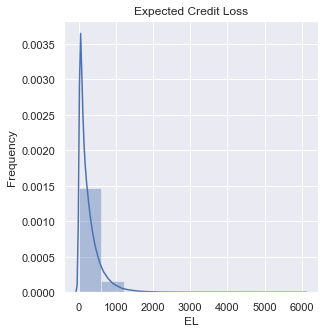

In [29]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['EL'].astype(int), bins = 10)
#Setting graph title
hist.set_title('Expected Credit Loss')
hist.set(xlabel = 'EL', ylabel = 'Frequency')

In [30]:
data['EL'].describe()

count    436781.000000
mean        275.353184
std         315.477606
min           0.957046
25%          68.345503
50%         171.578079
75%         368.392250
max        6347.179317
Name: EL, dtype: float64

In [31]:
data['EL'].median()

171.5780791

[Text(0.5, 0, 'funded_amnt'), Text(0, 0.5, 'Frequency')]

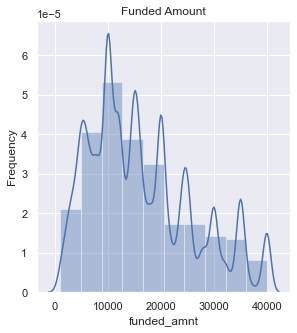

In [32]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['funded_amnt'].astype(float), bins = 10)
#Setting graph title
hist.set_title('Funded Amount')
hist.set(xlabel = 'funded_amnt', ylabel = 'Frequency')

In [33]:
data['funded_amnt'].describe()

count    436781.000000
mean      16218.593929
std        9702.279553
min        1000.000000
25%        9000.000000
50%       15000.000000
75%       22000.000000
max       40000.000000
Name: funded_amnt, dtype: float64

[Text(0.5, 0, 'installment'), Text(0, 0.5, 'Frequency')]

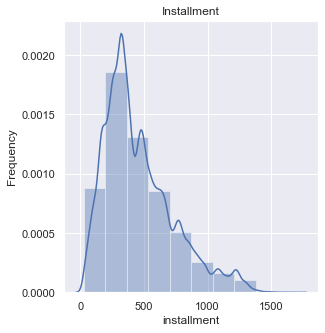

In [34]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['installment'].astype(float), bins = 10)
#Setting graph title
hist.set_title('Installment')
hist.set(xlabel = 'installment', ylabel = 'Frequency')

In [35]:
data['installment'].describe()

count    436781.000000
mean        459.586848
std         271.513175
min          29.760000
25%         262.140000
50%         389.260000
75%         609.440000
max        1714.540000
Name: installment, dtype: float64

[Text(0.5, 0, 'int_rate'), Text(0, 0.5, 'Frequency')]

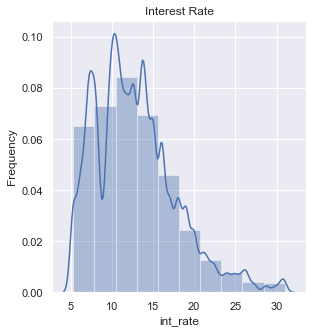

In [36]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['int_rate'].astype(float), bins = 10)
#Setting graph title
hist.set_title('Interest Rate')
hist.set(xlabel = 'int_rate', ylabel = 'Frequency')

In [37]:
data['int_rate'].describe()

count    436781.000000
mean         12.847981
std           4.935554
min           5.310000
25%           9.440000
50%          11.990000
75%          15.610000
max          30.990000
Name: int_rate, dtype: float64

[Text(0.5, 0, 'annual_inc'), Text(0, 0.5, 'Frequency')]

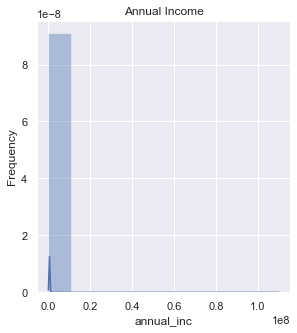

In [38]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1
        )
#Define plot object
hist = sns.distplot(trainset['annual_inc'].astype(int), bins = 10)
#Setting graph title
hist.set_title('Annual Income')
hist.set(xlabel = 'annual_inc', ylabel = 'Frequency')

In [39]:
data['annual_inc'].describe()

count    4.367810e+05
mean     8.021807e+04
std      1.827729e+05
min      0.000000e+00
25%      4.714100e+04
50%      6.700000e+04
75%      9.600000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

[Text(0.5, 0, 'dti'), Text(0, 0.5, 'Frequency')]

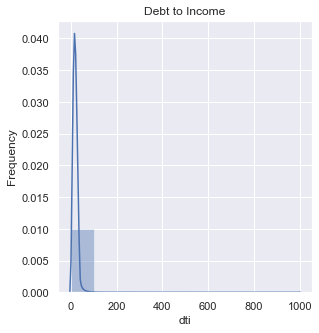

In [40]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['dti'].astype(float), bins = 10)
#Setting graph title
hist.set_title('Debt to Income')
hist.set(xlabel = 'dti', ylabel = 'Frequency')

In [41]:
data['dti'].describe()

count    436781.000000
mean         19.855706
std          18.197287
min           0.000000
25%          12.250000
50%          18.430000
75%          25.400000
max         999.000000
Name: dti, dtype: float64

[Text(0.5, 0, 'fico_range_low'), Text(0, 0.5, 'Frequency')]

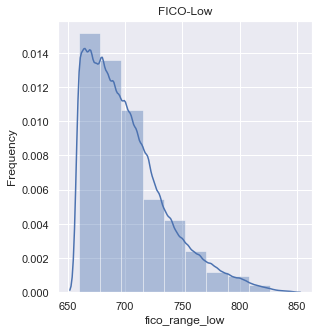

In [42]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['fico_range_low'].astype(float), bins = 10)
#Setting graph title
hist.set_title('FICO-Low')
hist.set(xlabel = 'fico_range_low', ylabel = 'Frequency')

In [43]:
data['fico_range_low'].describe()

count    436781.000000
mean        701.928644
std          34.241450
min         660.000000
25%         675.000000
50%         695.000000
75%         720.000000
max         845.000000
Name: fico_range_low, dtype: float64

[Text(0.5, 0, 'fico_range_high'), Text(0, 0.5, 'Frequency')]

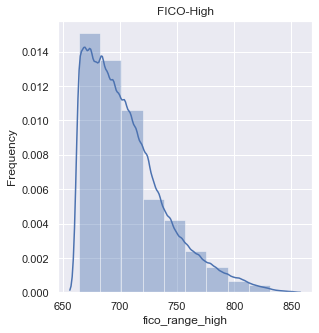

In [44]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['fico_range_high'].astype(float), bins = 10)
#Setting graph title
hist.set_title('FICO-High')
hist.set(xlabel = 'fico_range_high', ylabel = 'Frequency')

In [45]:
data['fico_range_high'].describe()

count    436781.000000
mean        705.928898
std          34.242515
min         664.000000
25%         679.000000
50%         699.000000
75%         724.000000
max         850.000000
Name: fico_range_high, dtype: float64

[Text(0.5, 0, 'inq_last_6mths'), Text(0, 0.5, 'Frequency')]

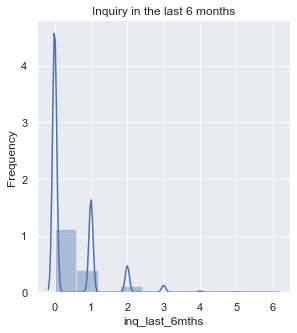

In [46]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['inq_last_6mths'].astype(float), bins = 10)
#Setting graph title
hist.set_title('Inquiry in the last 6 months')
hist.set(xlabel = 'inq_last_6mths', ylabel = 'Frequency')

In [47]:
data['inq_last_6mths'].describe()

count    436781.000000
mean          0.441466
std           0.736682
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           6.000000
Name: inq_last_6mths, dtype: float64

[Text(0.5, 0, 'open_acc'), Text(0, 0.5, 'Frequency')]

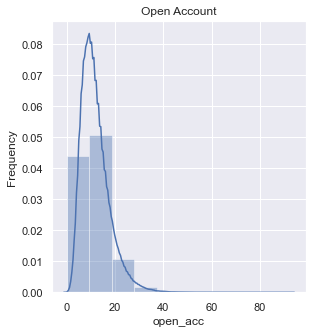

In [48]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['open_acc'].astype(float), bins = 10)
#Setting graph title
hist.set_title('Open Account')
hist.set(xlabel = 'open_acc', ylabel = 'Frequency')

In [49]:
data['open_acc'].describe()

count    436781.000000
mean         11.725567
std           5.866739
min           0.000000
25%           8.000000
50%          11.000000
75%          15.000000
max          93.000000
Name: open_acc, dtype: float64

[Text(0.5, 0, 'pub_rec'), Text(0, 0.5, 'Frequency')]

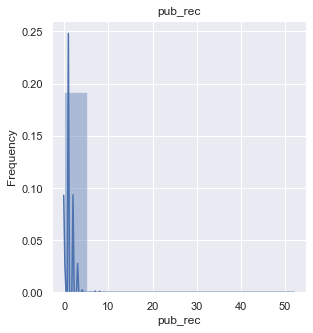

In [50]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['pub_rec'].astype(float), bins = 10)
#Setting graph title
hist.set_title('pub_rec')
hist.set(xlabel = 'pub_rec', ylabel = 'Frequency')

In [51]:
data['pub_rec'].describe()

count    436781.000000
mean          0.172084
std           0.526022
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          52.000000
Name: pub_rec, dtype: float64

[Text(0.5, 0, 'acc_now_delinq'), Text(0, 0.5, 'Frequency')]

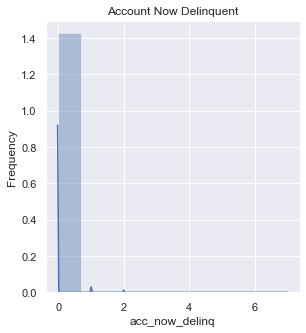

In [52]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['acc_now_delinq'].astype(float), bins = 10)
#Setting graph title
hist.set_title('Account Now Delinquent')
hist.set(xlabel = 'acc_now_delinq', ylabel = 'Frequency')

In [53]:
data['acc_now_delinq'].describe()

count    436781.000000
mean          0.003315
std           0.061485
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: acc_now_delinq, dtype: float64

[Text(0.5, 0, 'out_prncp'), Text(0, 0.5, 'Frequency')]

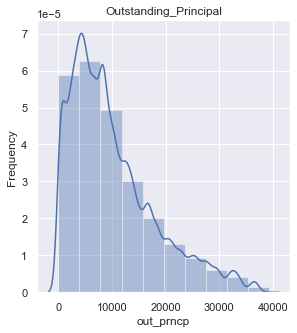

In [54]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['out_prncp'].astype(float), bins = 10)
#Setting graph title
hist.set_title('Outstanding_Principal')
hist.set(xlabel = 'out_prncp', ylabel = 'Frequency')

In [55]:
data['out_prncp'].describe()

count    436781.000000
mean      10136.836953
std        7961.477347
min           0.000000
25%        4145.770000
50%        8208.540000
75%       14058.280000
max       39257.670000
Name: out_prncp, dtype: float64

[Text(0.5, 0, 'delinq_amnt'), Text(0, 0.5, 'Frequency')]

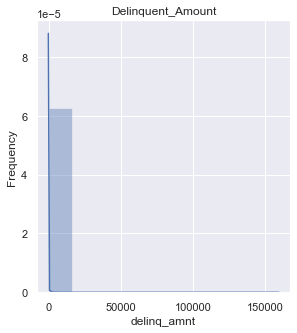

In [56]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['delinq_amnt'].astype(float), bins = 10)
#Setting graph title
hist.set_title('Delinquent_Amount')
hist.set(xlabel = 'delinq_amnt', ylabel = 'Frequency')

In [57]:
data['delinq_amnt'].describe()

count    436781.000000
mean          9.542114
std         644.010087
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      159177.000000
Name: delinq_amnt, dtype: float64

##### VISUALIZATION OF CATEGORICAL VARIABLES VARIABLES

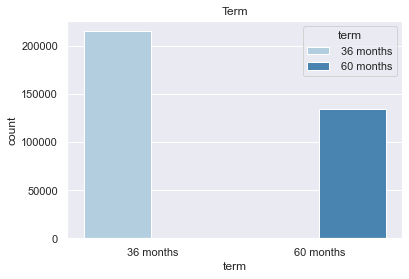

In [58]:
sns.color_palette(palette=None, n_colors=None, desat=None)
sns.countplot(x = 'term', hue = 'term', data = trainset, palette = 'Blues')
plt.title('Term')
plt.show()
sns.set_theme(style="whitegrid")

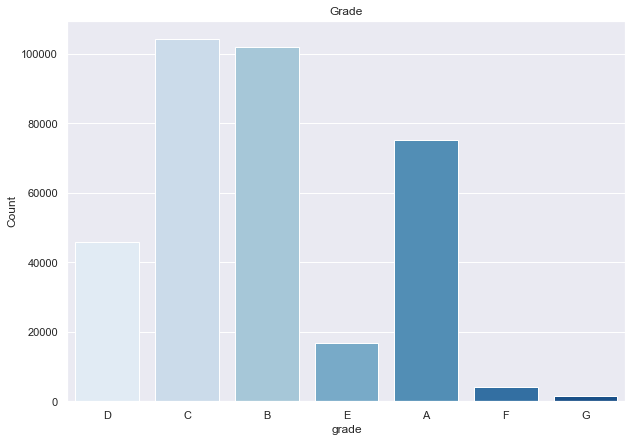

In [59]:
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(trainset['grade'],palette='Blues')
sns.set_theme(style="whitegrid")
plt.xlabel("grade")
plt.ylabel("Count")
plt.title("Grade")
plt.show()

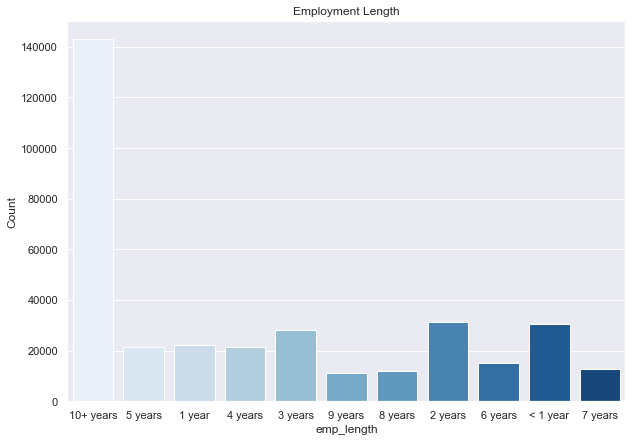

In [60]:
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(trainset['emp_length'],palette='Blues')
sns.set_theme(style="whitegrid")
plt.xlabel("emp_length")
plt.ylabel("Count")
plt.title("Employment Length")
plt.show()

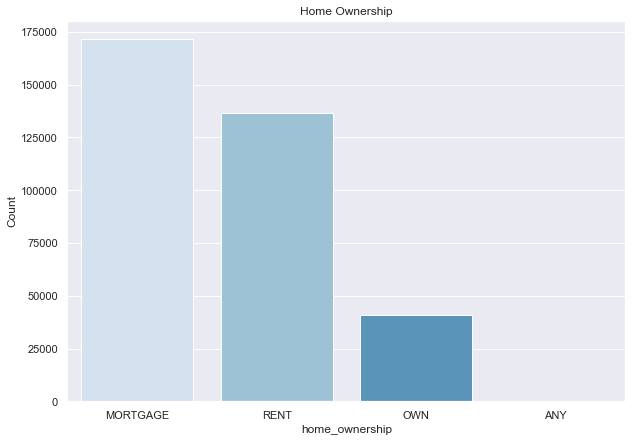

In [61]:
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(trainset['home_ownership'],palette='Blues')
sns.set_theme(style="whitegrid")
plt.xlabel("home_ownership")
plt.ylabel("Count")
plt.title("Home Ownership")
plt.show()

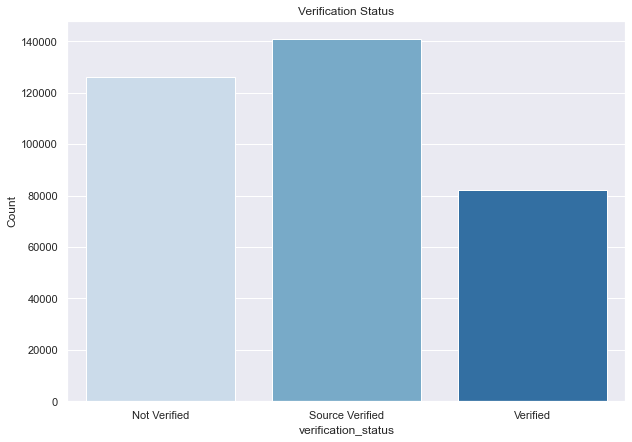

In [62]:
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(trainset['verification_status'],palette='Blues')
sns.set_theme(style="whitegrid")
plt.xlabel("verification_status")
plt.ylabel("Count")
plt.title("Verification Status")
plt.show()

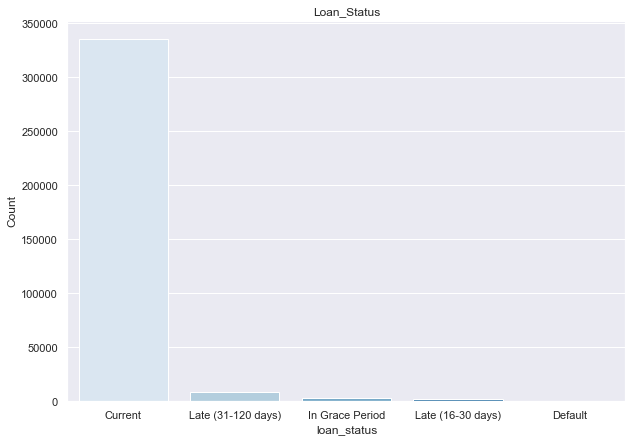

In [63]:
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(trainset['loan_status'],palette='Blues')
sns.set_theme(style="whitegrid")
plt.xlabel("loan_status")
plt.ylabel("Count")
plt.title("Loan_Status")

plt.show()

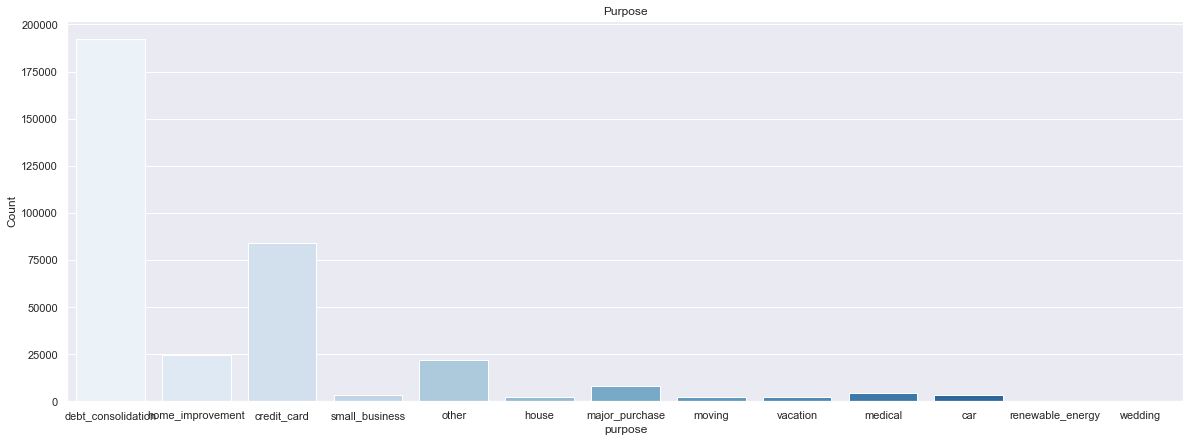

In [64]:
sns.set(rc={'figure.figsize':(20,7)})
sns.countplot(trainset['purpose'],palette='Blues')
sns.set_theme(style="whitegrid")
plt.xlabel("purpose")
plt.ylabel("Count")
plt.title("Purpose")

plt.show()

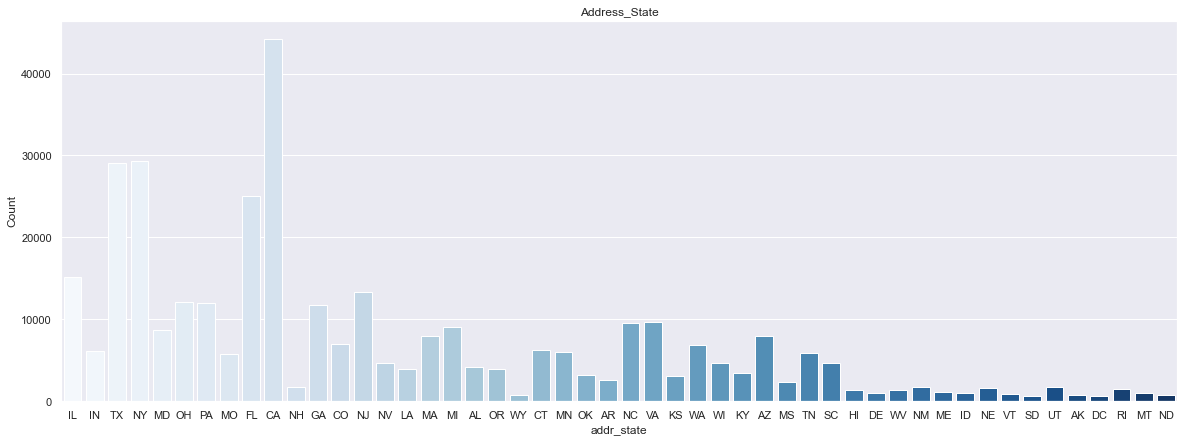

In [65]:
sns.set(rc={'figure.figsize':(20,7)})
sns.countplot(trainset['addr_state'],palette='Blues')
sns.set_theme(style="whitegrid")
plt.xlabel("addr_state")
plt.ylabel("Count")
plt.title("Address_State")

plt.show()

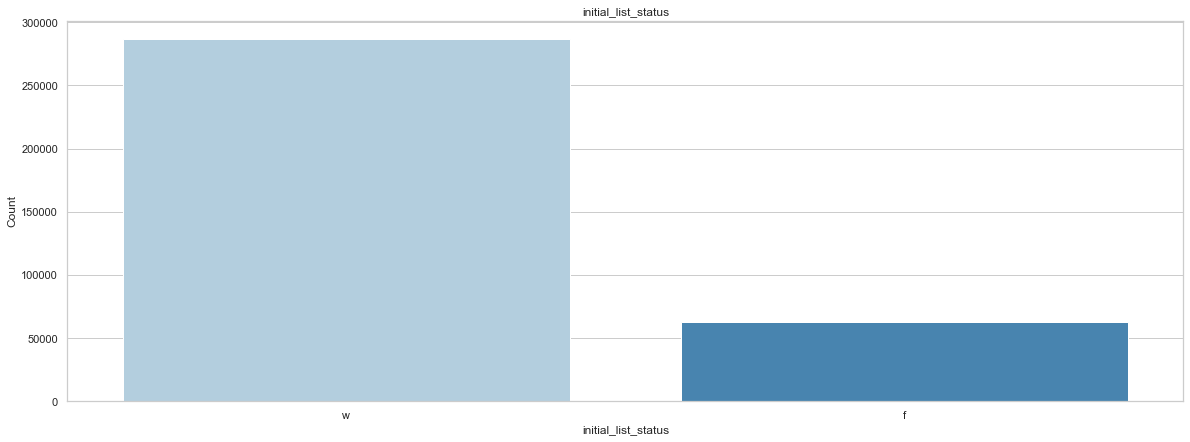

In [66]:
# sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(trainset['initial_list_status'],palette='Blues')
sns.set_theme(style="whitegrid")
plt.xlabel("initial_list_status")
plt.ylabel("Count")
plt.title("initial_list_status")
plt.show()

# Normalisation of the Continuous Variables

In [67]:
for x in ['EL',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'acc_now_delinq',
'fico_range_low',
'fico_range_high',
'inq_last_6mths',
'open_acc',
'pub_rec',
'acc_now_delinq',
'delinq_amnt']:
    # add 1 so that 0s remain 0s
    trainset[x] = np.log(trainset[x] + 1)
    testset[x] = np.log(testset[x] + 1)

[Text(0.5, 0, 'funded_amnt'), Text(0, 0.5, 'Frequency')]

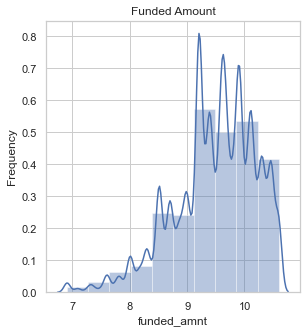

In [68]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['funded_amnt'].astype(float), bins = 10)
#Setting graph title
hist.set_title('Funded Amount')
hist.set(xlabel = 'funded_amnt', ylabel = 'Frequency')

[Text(0.5, 0, 'annual_inc'), Text(0, 0.5, 'Frequency')]

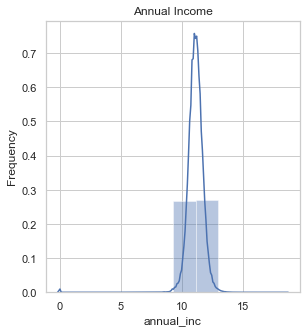

In [69]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['annual_inc'].astype(float), bins = 10)
#Setting graph title
hist.set_title('Annual Income')
hist.set(xlabel = 'annual_inc', ylabel = 'Frequency')

[Text(0.5, 0, 'dti'), Text(0, 0.5, 'Frequency')]

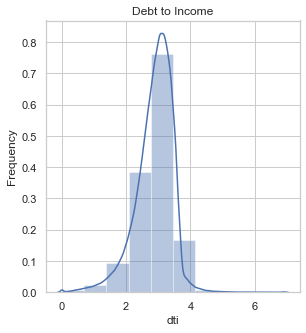

In [70]:
#Histogram to visualize variable
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
#Define plot object
hist = sns.distplot(trainset['dti'].astype(float), bins = 10)
#Setting graph title
hist.set_title('Debt to Income')
hist.set(xlabel = 'dti', ylabel = 'Frequency')

# Handling Outliers

Text(0.5, 1.0, 'Funded Amount')

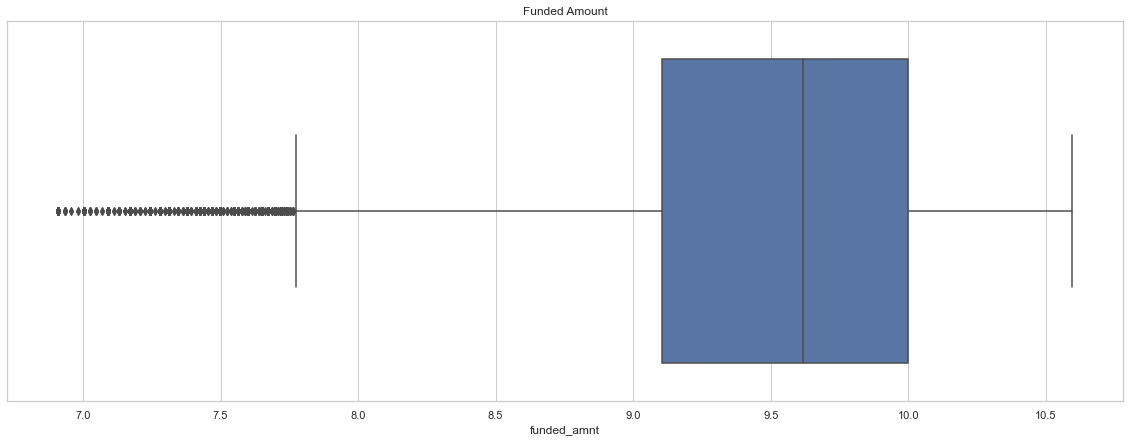

In [71]:
sns.set_theme(style="whitegrid")
sns.boxplot(trainset['funded_amnt'])
plt.title("Funded Amount")

Text(0.5, 1.0, 'Debt to Income')

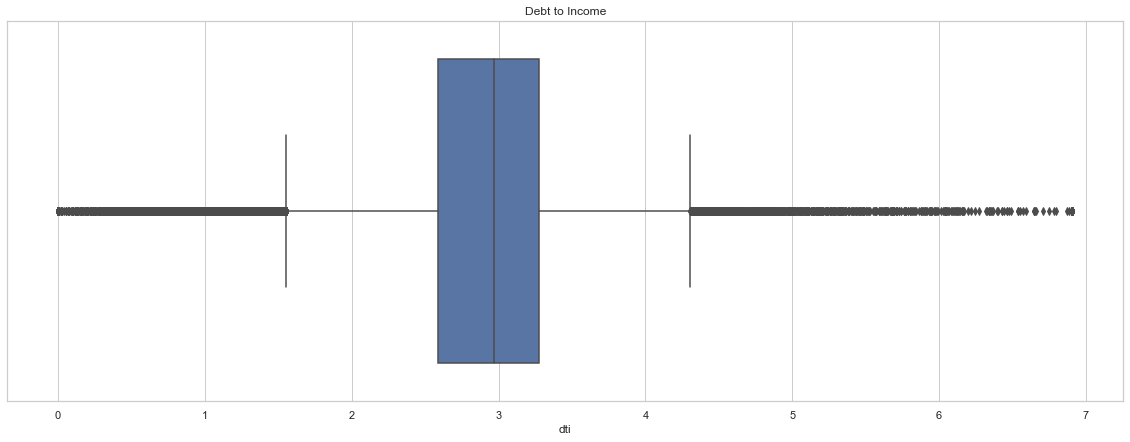

In [72]:
sns.set_theme(style="whitegrid")
sns.boxplot(trainset['dti'])
plt.title("Debt to Income")

Text(0.5, 1.0, 'Expected Loss')

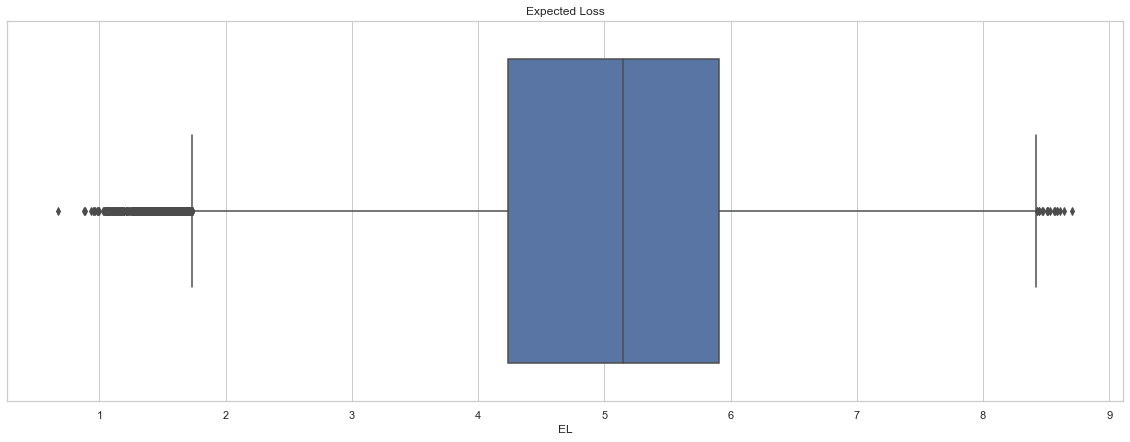

In [73]:
sns.set_theme(style="whitegrid")
sns.boxplot(trainset['EL'])
plt.title("Expected Loss")

Text(0.5, 1.0, 'Annual Income')

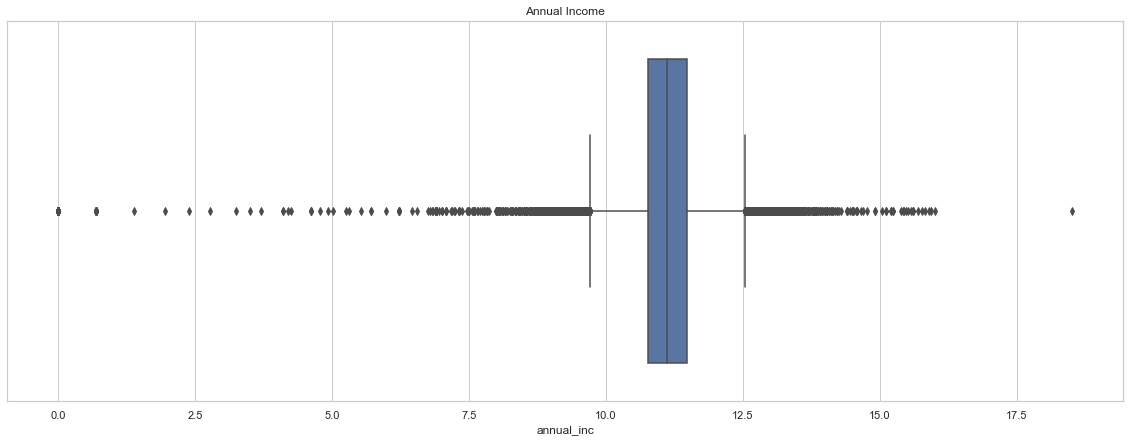

In [74]:
sns.set_theme(style="whitegrid")
sns.boxplot(trainset['annual_inc'])
plt.title("Annual Income")

In [75]:
def find_outliers_IQR(trainset):

   Q1=trainset.quantile(0.25)

   Q3=trainset.quantile(0.75)

   IQR=Q3-Q1

   outliers = trainset[((trainset<(Q1-1.5*IQR)) | (trainset>(Q3+1.5*IQR)))]

   return outliers

outliers_EL                = find_outliers_IQR(trainset["EL"])
outliers_funded_amnt       = find_outliers_IQR(trainset["funded_amnt"])
outliers_int_rate          = find_outliers_IQR(trainset["int_rate"])
outliers_installment       = find_outliers_IQR(trainset["installment"])
outliers_annual_inc        = find_outliers_IQR(trainset["annual_inc"])
outliers_dti               = find_outliers_IQR(trainset["dti"])
outliers_fico_range_low    = find_outliers_IQR(trainset["fico_range_low"])
outliers_fico_range_high   = find_outliers_IQR(trainset["fico_range_high"])
outliers_inq_last_6mths    = find_outliers_IQR(trainset["inq_last_6mths"])
outliers_open_acc          = find_outliers_IQR(trainset["open_acc"])
outliers_pub_rec           = find_outliers_IQR(trainset["pub_rec"])
outliers_delinq_amnt       = find_outliers_IQR(trainset["delinq_amnt"])
outliers_acc_now_delinq    = find_outliers_IQR(trainset["acc_now_delinq"])

print(f"number of outliers in EL:              {str(len(outliers_EL))}")
print(f"number of outliers in funded_amnt:     {str(len(outliers_funded_amnt))}")
print(f"number of outliers in int_rate:        {str(len(outliers_int_rate))}")
print(f"number of outliers in installment:     {str(len(outliers_installment))}")
print(f"number of outliers in annual_inc:      {str(len(outliers_annual_inc))}")
print(f"number of outliers in dti:             {str(len(outliers_dti))}")
print(f"number of outliers in fico_range_low:  {str(len(outliers_fico_range_low))}")
print(f"number of outliers in fico_range_high: {str(len(outliers_fico_range_high))}")
print(f"number of outliers in inq_last_6mths:  {str(len(outliers_inq_last_6mths))}")
print(f"number of outliers in open_acc:        {str(len(outliers_open_acc))}")
print(f"number of outliers in pub_rec:         {str(len(outliers_pub_rec))}")
print(f"number of outliers in delinq_amnt:     {str(len(outliers_delinq_amnt))}")
print(f"number of outliers in acc_now_delinq:  {str(len(outliers_acc_now_delinq))}")

number of outliers in EL:              700
number of outliers in funded_amnt:     6834
number of outliers in int_rate:        0
number of outliers in installment:     6298
number of outliers in annual_inc:      7971
number of outliers in dti:             11994
number of outliers in fico_range_low:  7399
number of outliers in fico_range_high: 7399
number of outliers in inq_last_6mths:  324
number of outliers in open_acc:        3459
number of outliers in pub_rec:         49209
number of outliers in delinq_amnt:     941
number of outliers in acc_now_delinq:  1092


In [76]:
for x in ['EL',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'acc_now_delinq',
'fico_range_low',
'fico_range_high',
'inq_last_6mths',
'open_acc',
'pub_rec',
'acc_now_delinq',
'delinq_amnt']:
    Q3,Q1 = np.percentile(trainset.loc[:,x],[75,25])
    intr_qr = Q3-Q1
 
    max = Q3+(1.5*intr_qr)
    min = Q1-(1.5*intr_qr)
 
    trainset.loc[trainset[x] < min,x] = np.nan
    trainset.loc[trainset[x] > max,x] = np.nan

In [77]:
trainset.isnull().sum()

funded_amnt             6834
term                       0
int_rate                   0
installment             6298
grade                      0
emp_length                 0
home_ownership             0
annual_inc              7971
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                    11994
earliest_cr_line           0
fico_range_low          7399
fico_range_high         7399
inq_last_6mths           324
open_acc                3459
pub_rec                49209
initial_list_status        0
out_prncp                  0
acc_now_delinq          1092
delinq_amnt              941
EL                       700
dtype: int64

In [78]:
int_rate_mean = trainset.int_rate.mean()
trainset.int_rate.fillna(int_rate_mean, inplace=True)

installment_mean = trainset.installment.mean()
trainset.installment.fillna(installment_mean, inplace=True)

annual_inc_mean = trainset.annual_inc.mean()
trainset.annual_inc.fillna(annual_inc_mean, inplace=True)

dti_mean = trainset.dti.mean()
trainset.dti.fillna(dti_mean, inplace=True)

fico_range_low_mean = trainset.fico_range_low.mean()
trainset.fico_range_low.fillna(fico_range_low_mean, inplace=True)

fico_range_high_mean = trainset.fico_range_high.mean()
trainset.fico_range_high.fillna(fico_range_high_mean, inplace=True)

inq_last_6mths_mean = trainset.inq_last_6mths.mean()
trainset.inq_last_6mths.fillna(inq_last_6mths_mean, inplace=True)

open_acc_mean = trainset.open_acc.mean()
trainset.open_acc.fillna(open_acc_mean, inplace=True)

pub_rec_mean = trainset.pub_rec.mean()
trainset.pub_rec.fillna(pub_rec_mean, inplace=True)

acc_now_delinq_mean = trainset.acc_now_delinq.mean()
trainset.acc_now_delinq.fillna(acc_now_delinq_mean, inplace=True)

delinq_amnt_mean = trainset.delinq_amnt.mean()
trainset.delinq_amnt.fillna(delinq_amnt_mean, inplace=True)

funded_amnt_mean = trainset.funded_amnt.mean()
trainset.funded_amnt.fillna(funded_amnt_mean, inplace=True)

EL_mean = trainset.EL.mean()
trainset.EL.fillna(EL_mean, inplace=True)

In [79]:
trainset.isnull().sum()

funded_amnt            0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
addr_state             0
dti                    0
earliest_cr_line       0
fico_range_low         0
fico_range_high        0
inq_last_6mths         0
open_acc               0
pub_rec                0
initial_list_status    0
out_prncp              0
acc_now_delinq         0
delinq_amnt            0
EL                     0
dtype: int64

Text(0.5, 1.0, 'EL')

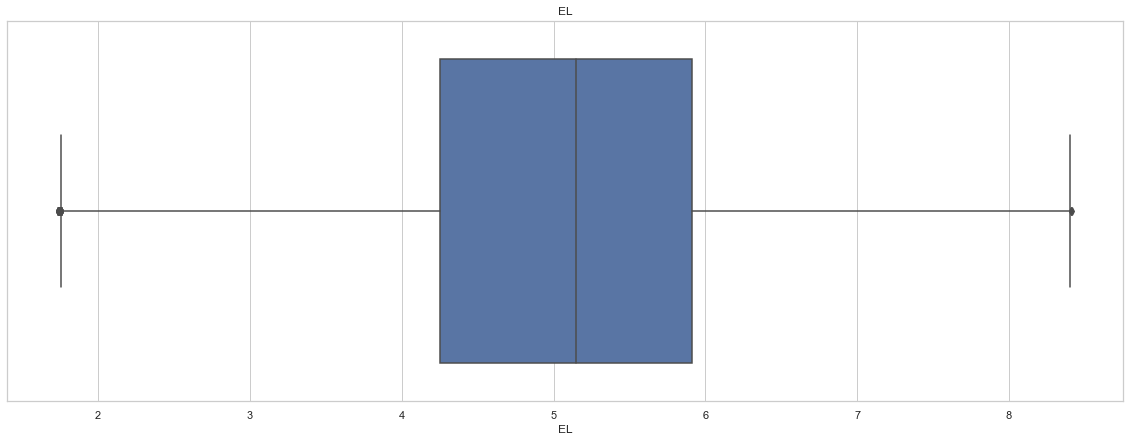

In [80]:
sns.set_theme(style="whitegrid")
sns.boxplot(trainset['EL'])
plt.title("EL")

Text(0.5, 1.0, 'Funded Amount')

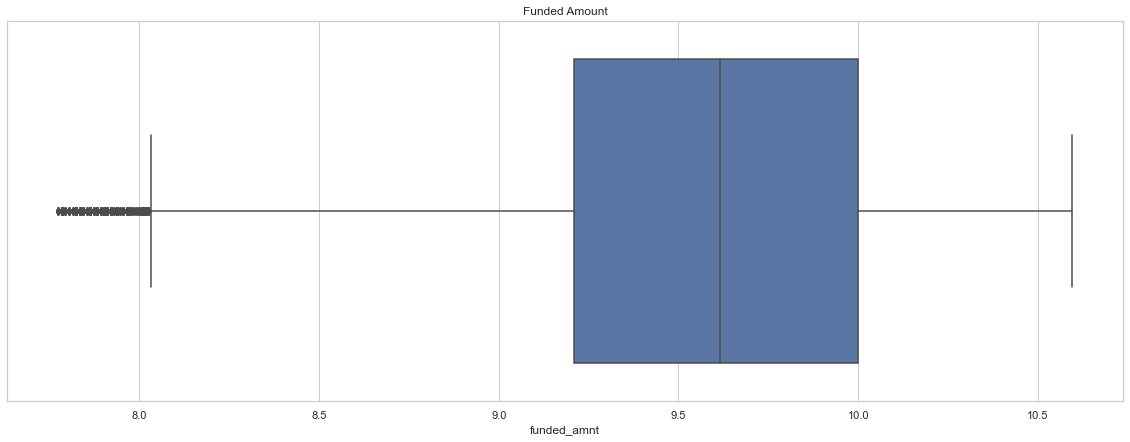

In [81]:
sns.set_theme(style="whitegrid")
sns.boxplot(trainset['funded_amnt'])
plt.title("Funded Amount")

Text(0.5, 1.0, 'Debt to Income')

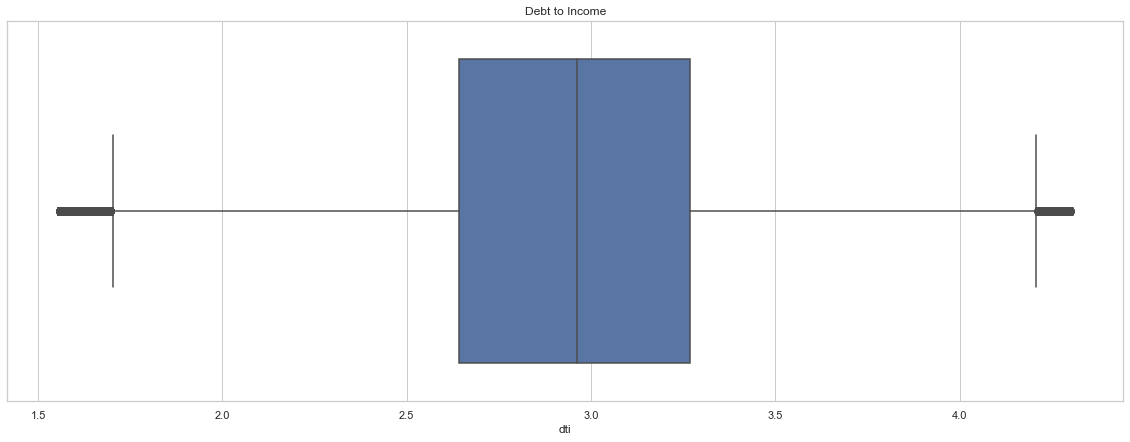

In [82]:
sns.set_theme(style="whitegrid")
sns.boxplot(trainset['dti'])
plt.title("Debt to Income")

Text(0.5, 1.0, 'Annual Income')

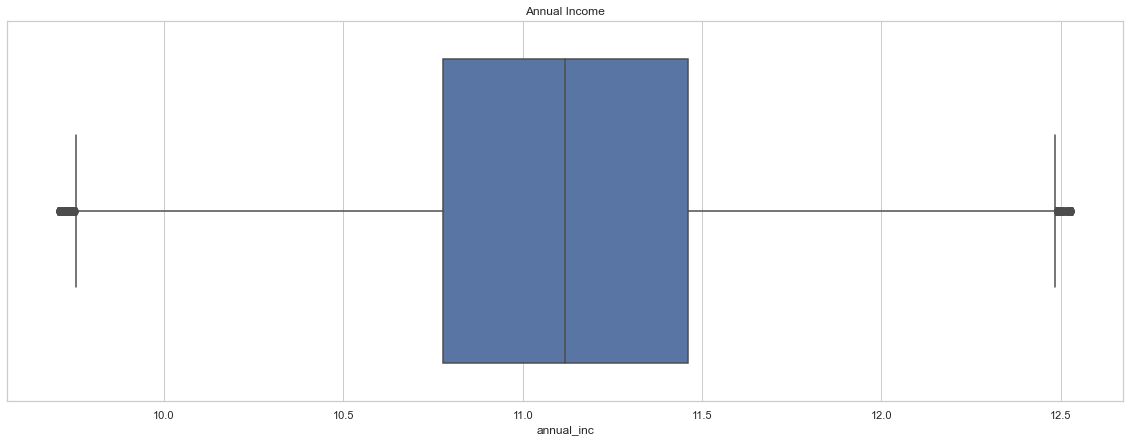

In [83]:
sns.set_theme(style="whitegrid")
sns.boxplot(trainset['annual_inc'])
plt.title("Annual Income")

In [84]:
def find_outliers_IQR(trainset):

   q1=trainset.quantile(0.25)

   q3=trainset.quantile(0.75)

   IQR=q3-q1

   outliers = trainset[((trainset<(q1-1.5*IQR)) | (trainset>(q3+1.5*IQR)))]

   return outliers

outliers_EL                = find_outliers_IQR(trainset["EL"])
outliers_funded_amnt       = find_outliers_IQR(trainset["funded_amnt"])
outliers_int_rate          = find_outliers_IQR(trainset["int_rate"])
outliers_installment       = find_outliers_IQR(trainset["installment"])
outliers_annual_inc        = find_outliers_IQR(trainset["annual_inc"])
outliers_dti               = find_outliers_IQR(trainset["dti"])
outliers_fico_range_low    = find_outliers_IQR(trainset["fico_range_low"])
outliers_fico_range_high   = find_outliers_IQR(trainset["fico_range_high"])
outliers_inq_last_6mths    = find_outliers_IQR(trainset["inq_last_6mths"])
outliers_open_acc          = find_outliers_IQR(trainset["open_acc"])
outliers_pub_rec           = find_outliers_IQR(trainset["pub_rec"])
outliers_delinq_amnt       = find_outliers_IQR(trainset["delinq_amnt"])
outliers_acc_now_delinq    = find_outliers_IQR(trainset["acc_now_delinq"])

print(f"number of outliers in EL:              {str(len(outliers_EL))}")
print(f"number of outliers in funded_amnt:     {str(len(outliers_funded_amnt))}")
print(f"number of outliers in int_rate:        {str(len(outliers_int_rate))}")
print(f"number of outliers in installment:     {str(len(outliers_installment))}")
print(f"number of outliers in annual_inc:      {str(len(outliers_annual_inc))}")
print(f"number of outliers in dti:             {str(len(outliers_dti))}")
print(f"number of outliers in fico_range_low:  {str(len(outliers_fico_range_low))}")
print(f"number of outliers in fico_range_high: {str(len(outliers_fico_range_high))}")
print(f"number of outliers in inq_last_6mths:  {str(len(outliers_inq_last_6mths))}")
print(f"number of outliers in open_acc:        {str(len(outliers_open_acc))}")
print(f"number of outliers in pub_rec:         {str(len(outliers_pub_rec))}")
print(f"number of outliers in delinq_amnt:     {str(len(outliers_delinq_amnt))}")
print(f"number of outliers in acc_now_delinq:  {str(len(outliers_acc_now_delinq))}")

number of outliers in EL:              66
number of outliers in funded_amnt:     7731
number of outliers in int_rate:        0
number of outliers in installment:     1248
number of outliers in annual_inc:      946
number of outliers in dti:             4068
number of outliers in fico_range_low:  0
number of outliers in fico_range_high: 0
number of outliers in inq_last_6mths:  0
number of outliers in open_acc:        0
number of outliers in pub_rec:         0
number of outliers in delinq_amnt:     0
number of outliers in acc_now_delinq:  0


In [85]:
def find_outliers_IQR(trainset):

   q1=trainset.quantile(0.25)

   q3=trainset.quantile(0.75)

   IQR=q3-q1

   outliers = trainset[((trainset<(q1-1.5*IQR)) | (trainset>(q3+1.5*IQR)))]

   return outliers

outliers_EL                = find_outliers_IQR(trainset["EL"])
outliers_funded_amnt       = find_outliers_IQR(trainset["funded_amnt"])
outliers_int_rate          = find_outliers_IQR(trainset["int_rate"])
outliers_installment       = find_outliers_IQR(trainset["installment"])
outliers_annual_inc        = find_outliers_IQR(trainset["annual_inc"])
outliers_dti               = find_outliers_IQR(trainset["dti"])
outliers_fico_range_low    = find_outliers_IQR(trainset["fico_range_low"])
outliers_fico_range_high   = find_outliers_IQR(trainset["fico_range_high"])
outliers_inq_last_6mths    = find_outliers_IQR(trainset["inq_last_6mths"])
outliers_open_acc          = find_outliers_IQR(trainset["open_acc"])
outliers_pub_rec           = find_outliers_IQR(trainset["pub_rec"])
outliers_delinq_amnt       = find_outliers_IQR(trainset["delinq_amnt"])
outliers_acc_now_delinq    = find_outliers_IQR(trainset["acc_now_delinq"])

print(f"number of outliers in EL:              {str(len(outliers_EL))}")
print(f"number of outliers in funded_amnt:     {str(len(outliers_funded_amnt))}")
print(f"number of outliers in int_rate:        {str(len(outliers_int_rate))}")
print(f"number of outliers in installment:     {str(len(outliers_installment))}")
print(f"number of outliers in annual_inc:      {str(len(outliers_annual_inc))}")
print(f"number of outliers in dti:             {str(len(outliers_dti))}")
print(f"number of outliers in fico_range_low:  {str(len(outliers_fico_range_low))}")
print(f"number of outliers in fico_range_high: {str(len(outliers_fico_range_high))}")
print(f"number of outliers in inq_last_6mths:  {str(len(outliers_inq_last_6mths))}")
print(f"number of outliers in open_acc:        {str(len(outliers_open_acc))}")
print(f"number of outliers in pub_rec:         {str(len(outliers_pub_rec))}")
print(f"number of outliers in delinq_amnt:     {str(len(outliers_delinq_amnt))}")
print(f"number of outliers in acc_now_delinq:  {str(len(outliers_acc_now_delinq))}")


number of outliers in EL:              66
number of outliers in funded_amnt:     7731
number of outliers in int_rate:        0
number of outliers in installment:     1248
number of outliers in annual_inc:      946
number of outliers in dti:             4068
number of outliers in fico_range_low:  0
number of outliers in fico_range_high: 0
number of outliers in inq_last_6mths:  0
number of outliers in open_acc:        0
number of outliers in pub_rec:         0
number of outliers in delinq_amnt:     0
number of outliers in acc_now_delinq:  0


### Handling Outliers for the testset

In [86]:
def find_outliers_IQR(testset):

   Q1=testset.quantile(0.25)

   Q3=testset.quantile(0.75)

   IQR=Q3-Q1

   outliers = testset[((testset<(Q1-1.5*IQR)) | (testset>(Q3+1.5*IQR)))]

   return outliers

outliers_EL                = find_outliers_IQR(testset["EL"])
outliers_funded_amnt       = find_outliers_IQR(testset["funded_amnt"])
outliers_int_rate          = find_outliers_IQR(testset["int_rate"])
outliers_installment       = find_outliers_IQR(testset["installment"])
outliers_annual_inc        = find_outliers_IQR(testset["annual_inc"])
outliers_dti               = find_outliers_IQR(testset["dti"])
outliers_fico_range_low    = find_outliers_IQR(testset["fico_range_low"])
outliers_fico_range_high   = find_outliers_IQR(testset["fico_range_high"])
outliers_inq_last_6mths    = find_outliers_IQR(testset["inq_last_6mths"])
outliers_open_acc          = find_outliers_IQR(testset["open_acc"])
outliers_pub_rec           = find_outliers_IQR(testset["pub_rec"])
outliers_delinq_amnt       = find_outliers_IQR(testset["delinq_amnt"])
outliers_acc_now_delinq    = find_outliers_IQR(testset["acc_now_delinq"])

print(f"number of outliers in EL:              {str(len(outliers_EL))}")
print(f"number of outliers in funded_amnt:     {str(len(outliers_funded_amnt))}")
print(f"number of outliers in int_rate:        {str(len(outliers_int_rate))}")
print(f"number of outliers in installment:     {str(len(outliers_installment))}")
print(f"number of outliers in annual_inc:      {str(len(outliers_annual_inc))}")
print(f"number of outliers in dti:             {str(len(outliers_dti))}")
print(f"number of outliers in fico_range_low:  {str(len(outliers_fico_range_low))}")
print(f"number of outliers in fico_range_high: {str(len(outliers_fico_range_high))}")
print(f"number of outliers in inq_last_6mths:  {str(len(outliers_inq_last_6mths))}")
print(f"number of outliers in open_acc:        {str(len(outliers_open_acc))}")
print(f"number of outliers in pub_rec:         {str(len(outliers_pub_rec))}")
print(f"number of outliers in delinq_amnt:     {str(len(outliers_delinq_amnt))}")
print(f"number of outliers in acc_now_delinq:  {str(len(outliers_acc_now_delinq))}")



number of outliers in EL:              166
number of outliers in funded_amnt:     1733
number of outliers in int_rate:        0
number of outliers in installment:     1610
number of outliers in annual_inc:      1881
number of outliers in dti:             2937
number of outliers in fico_range_low:  1790
number of outliers in fico_range_high: 1790
number of outliers in inq_last_6mths:  76
number of outliers in open_acc:        871
number of outliers in pub_rec:         12408
number of outliers in delinq_amnt:     245
number of outliers in acc_now_delinq:  275


In [87]:
for x in ['EL',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'acc_now_delinq',
'fico_range_low',
'fico_range_high',
'inq_last_6mths',
'open_acc',
'pub_rec',
'acc_now_delinq',
'delinq_amnt']:
    Q3,Q1 = np.percentile(testset.loc[:,x],[75,25])
    intr_qr = Q3-Q1
 
    max = Q3+(1.5*intr_qr)
    min = Q1-(1.5*intr_qr)
 
    testset.loc[testset[x] < min,x] = np.nan
    testset.loc[testset[x] > max,x] = np.nan

In [88]:
int_rate_mean = testset.int_rate.mean()
testset.int_rate.fillna(int_rate_mean, inplace=True)

installment_mean = testset.installment.mean()
testset.installment.fillna(installment_mean, inplace=True)

annual_inc_mean = testset.annual_inc.mean()
testset.annual_inc.fillna(annual_inc_mean, inplace=True)

dti_mean = testset.dti.mean()
testset.dti.fillna(dti_mean, inplace=True)

fico_range_low_mean = testset.fico_range_low.mean()
testset.fico_range_low.fillna(fico_range_low_mean, inplace=True)

fico_range_high_mean = testset.fico_range_high.mean()
testset.fico_range_high.fillna(fico_range_high_mean, inplace=True)

inq_last_6mths_mean = testset.inq_last_6mths.mean()
testset.inq_last_6mths.fillna(inq_last_6mths_mean, inplace=True)

open_acc_mean = testset.open_acc.mean()
testset.open_acc.fillna(open_acc_mean, inplace=True)

pub_rec_mean = testset.pub_rec.mean()
testset.pub_rec.fillna(pub_rec_mean, inplace=True)

acc_now_delinq_mean = testset.acc_now_delinq.mean()
testset.acc_now_delinq.fillna(acc_now_delinq_mean, inplace=True)

delinq_amnt_mean = testset.delinq_amnt.mean()
testset.delinq_amnt.fillna(delinq_amnt_mean, inplace=True)

funded_amnt_mean = testset.funded_amnt.mean()
testset.funded_amnt.fillna(funded_amnt_mean, inplace=True)

EL_mean = testset.EL.mean()
testset.EL.fillna(EL_mean, inplace=True)

In [89]:
def find_outliers_IQR(testset):

   Q1=testset.quantile(0.25)

   Q3=testset.quantile(0.75)

   IQR=Q3-Q1

   outliers = testset[((testset<(Q1-1.5*IQR)) | (testset>(Q3+1.5*IQR)))]

   return outliers

outliers_EL                = find_outliers_IQR(testset["EL"])
outliers_funded_amnt       = find_outliers_IQR(testset["funded_amnt"])
outliers_int_rate          = find_outliers_IQR(testset["int_rate"])
outliers_installment       = find_outliers_IQR(testset["installment"])
outliers_annual_inc        = find_outliers_IQR(testset["annual_inc"])
outliers_dti               = find_outliers_IQR(testset["dti"])
outliers_fico_range_low    = find_outliers_IQR(testset["fico_range_low"])
outliers_fico_range_high   = find_outliers_IQR(testset["fico_range_high"])
outliers_inq_last_6mths    = find_outliers_IQR(testset["inq_last_6mths"])
outliers_open_acc          = find_outliers_IQR(testset["open_acc"])
outliers_pub_rec           = find_outliers_IQR(testset["pub_rec"])
outliers_delinq_amnt       = find_outliers_IQR(testset["delinq_amnt"])
outliers_acc_now_delinq    = find_outliers_IQR(testset["acc_now_delinq"])

print(f"number of outliers in EL:              {str(len(outliers_EL))}")
print(f"number of outliers in funded_amnt:     {str(len(outliers_funded_amnt))}")
print(f"number of outliers in int_rate:        {str(len(outliers_int_rate))}")
print(f"number of outliers in installment:     {str(len(outliers_installment))}")
print(f"number of outliers in annual_inc:      {str(len(outliers_annual_inc))}")
print(f"number of outliers in dti:             {str(len(outliers_dti))}")
print(f"number of outliers in fico_range_low:  {str(len(outliers_fico_range_low))}")
print(f"number of outliers in fico_range_high: {str(len(outliers_fico_range_high))}")
print(f"number of outliers in inq_last_6mths:  {str(len(outliers_inq_last_6mths))}")
print(f"number of outliers in open_acc:        {str(len(outliers_open_acc))}")
print(f"number of outliers in pub_rec:         {str(len(outliers_pub_rec))}")
print(f"number of outliers in delinq_amnt:     {str(len(outliers_delinq_amnt))}")
print(f"number of outliers in acc_now_delinq:  {str(len(outliers_acc_now_delinq))}")



number of outliers in EL:              9
number of outliers in funded_amnt:     836
number of outliers in int_rate:        0
number of outliers in installment:     311
number of outliers in annual_inc:      273
number of outliers in dti:             997
number of outliers in fico_range_low:  0
number of outliers in fico_range_high: 0
number of outliers in inq_last_6mths:  0
number of outliers in open_acc:        0
number of outliers in pub_rec:         0
number of outliers in delinq_amnt:     0
number of outliers in acc_now_delinq:  0


# Feature Engineering

1. earliest credit line date to the number of months
2. issue date to the number of months

## Trainset Feature Engineering

In [90]:
trainset['earliest_credit_line']=pd.to_datetime(trainset['earliest_cr_line'], format='%b-%y')
type(trainset['earliest_credit_line'])
pd.to_datetime('2018-12-01')-trainset['earliest_credit_line']
#convert to months
trainset['earliest_credit_line_months']=round(pd.to_numeric((pd.to_datetime('2018-12-01')- trainset['earliest_credit_line']
                                                        )/np.timedelta64(1, 'M')))
#Check the negative earliest credit line
trainset.loc[:,['earliest_cr_line','earliest_credit_line','earliest_credit_line_months']]
[trainset['earliest_credit_line_months']<0]
#Assign the maximum date to the negatives because they are from the 1990s and the system is built from 2000
trainset['earliest_credit_line_months'][trainset['earliest_credit_line_months']<0]=trainset['earliest_credit_line_months'].max()
#check the new minimum earliest credit line in months
trainset['earliest_credit_line_months'].describe()


count    349424.000000
mean        216.740590
std          96.093536
min          40.000000
25%         152.000000
50%         198.000000
75%         267.000000
max         599.000000
Name: earliest_credit_line_months, dtype: float64

In [91]:
trainset['earliest_issue_date']=pd.to_datetime(trainset['issue_d'], format='%b-%y')
type(trainset['earliest_issue_date'][0])
pd.to_datetime('2018-12-01')-trainset['earliest_issue_date']
#convert to months
trainset['months_since_issue_date']=round(pd.to_numeric((pd.to_datetime('2018-12-01')- trainset['earliest_issue_date']
                                                        )/np.timedelta64(1, 'M')))
#Check the negative earliest credit line
trainset.loc[:,['issue_d','earliest_issue_date','months_since_issue_date']]
[trainset['months_since_issue_date']<0]
#Assign the maximum date to the negatives because they are from the 1990s and the system is built from 2000
trainset['months_since_issue_date'][trainset['months_since_issue_date']<0]=trainset['months_since_issue_date'].max()
#check the new minimum earliest credit line in months
trainset['months_since_issue_date'].describe()

count    349424.000000
mean         16.282694
std          11.800487
min           3.000000
25%           5.000000
50%          15.000000
75%          20.000000
max          47.000000
Name: months_since_issue_date, dtype: float64

## Testset Feature Selection

In [92]:
testset['earliest_credit_line']=pd.to_datetime(testset['earliest_cr_line'], format='%b-%y')
type(testset['earliest_credit_line'])
pd.to_datetime('2018-12-01')-testset['earliest_credit_line']
#convert to months
testset['earliest_credit_line_months']=round(pd.to_numeric((pd.to_datetime('2018-12-01')- testset['earliest_credit_line']
                                                        )/np.timedelta64(1, 'M')))
#Check the negative earliest credit line
testset.loc[:,['earliest_cr_line','earliest_credit_line','earliest_credit_line_months']]
[testset['earliest_credit_line_months']<0]
#Assign the maximum date to the negatives because they are from the 1990s and the system is built from 2000
testset['earliest_credit_line_months'][testset['earliest_credit_line_months']<0]=testset['earliest_credit_line_months'].max()


In [93]:
testset['earliest_issue_date']=pd.to_datetime(testset['issue_d'], format='%b-%y')
type(testset['earliest_issue_date'])
pd.to_datetime('2018-12-01')-testset['earliest_issue_date']
#convert to months
testset['months_since_issue_date']=round(pd.to_numeric((pd.to_datetime('2018-12-01')- testset['earliest_issue_date']
                                                        )/np.timedelta64(1, 'M')))
#Check the negative earliest credit line
testset.loc[:,['issue_d','earliest_issue_date','months_since_issue_date']]
[testset['months_since_issue_date']<0]
#Assign the maximum date to the negatives because they are from the 1990s and the system is built from 2000
testset['months_since_issue_date'][testset['months_since_issue_date']<0]=testset['months_since_issue_date'].max()


Drop Original Columns


In [94]:
#Drop original date columns
trainset = trainset.drop(columns=['earliest_cr_line',
'issue_d', 'earliest_credit_line','earliest_issue_date'])

In [95]:
#Drop original date columns
testset = testset.drop(columns=['earliest_cr_line',
'issue_d','earliest_credit_line','earliest_issue_date'])

### Correlation Matrix

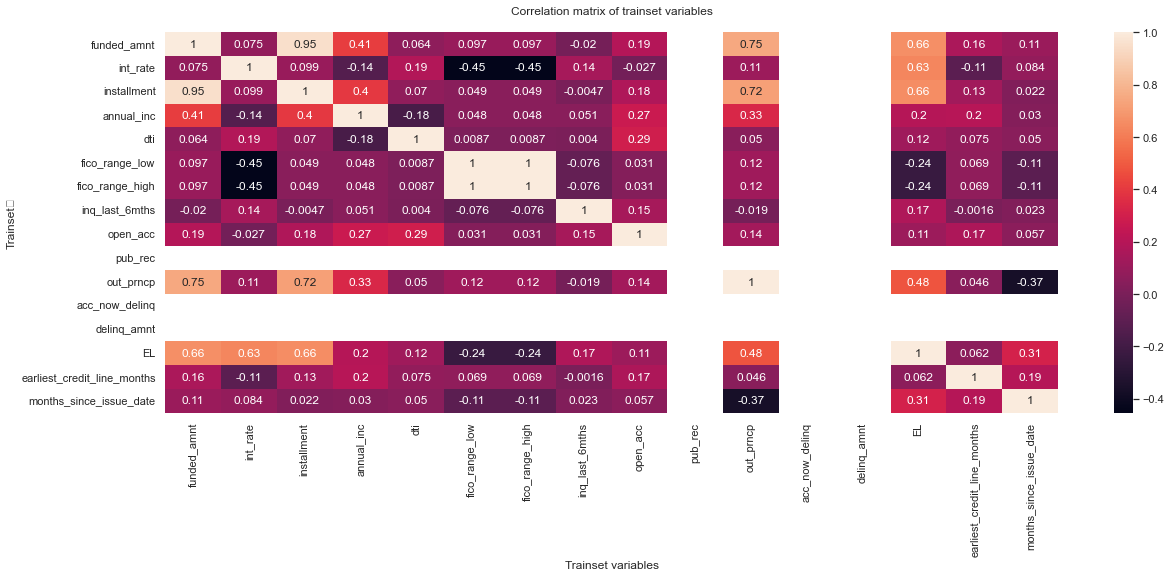

<Figure size 7200x720 with 0 Axes>

In [96]:
correlation = trainset.corr ()  
heatmap = sns. heatmap(correlation, annot = True)  
heatmap.set (xlabel = 'Trainset variables',ylabel = 'Trainset\t', title = "Correlation matrix of trainset variables\n")
plt.figure(figsize = (100,10))
plt. show ()  

# Create Dummies

### Create Dummies for Trainset

In [97]:
trainset_dummies=[pd.get_dummies(trainset['grade'], prefix='grade', prefix_sep=':'),
                  pd.get_dummies(trainset['term'], prefix='term', prefix_sep=':'),
                  pd.get_dummies(trainset['emp_length'], prefix='emp_length', prefix_sep=':'),
                  pd.get_dummies(trainset['home_ownership'], prefix='home_ownership', prefix_sep=':'),
                  pd.get_dummies(trainset['verification_status'], prefix='verification_status', prefix_sep=':'),
                  pd.get_dummies(trainset['loan_status'], prefix='loan_status', prefix_sep=':'),
                  pd.get_dummies(trainset['purpose'], prefix='purpose', prefix_sep=':'),
                  pd.get_dummies(trainset['addr_state'], prefix='addr_state', prefix_sep=':'),
                  pd.get_dummies(trainset['initial_list_status'], prefix='initial_list_status', prefix_sep=':')]

In [98]:
trainset_dummies=pd.concat(trainset_dummies, axis=1)

In [99]:
type(trainset_dummies)

pandas.core.frame.DataFrame

In [100]:
trainset=pd.concat([trainset, trainset_dummies], axis=1)
trainset.columns.values

array(['funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'addr_state',
       'dti', 'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'initial_list_status', 'out_prncp',
       'acc_now_delinq', 'delinq_amnt', 'EL',
       'earliest_credit_line_months', 'months_since_issue_date',
       'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'term: 36 months', 'term: 60 months',
       'emp_length:1 year', 'emp_length:10+ years', 'emp_length:2 years',
       'emp_length:3 years', 'emp_length:4 years', 'emp_length:5 years',
       'emp_length:6 years', 'emp_length:7 years', 'emp_length:8 years',
       'emp_length:9 years', 'emp_length:< 1 year', 'home_ownership:ANY',
       'home_ownership:MORTGAGE', 'home_ownership:OWN',
       'home_ownership:RENT', 'verification_status:Not Verified',
       'verification

In [101]:
#Drop original variables columns
trainset = trainset.drop(columns=['term',
'grade',
'emp_length',
'home_ownership',
'verification_status',
'loan_status',
'purpose',
'addr_state',
'initial_list_status'])

### Create Dummies for Testset

In [102]:
testset_dummies=[pd.get_dummies(testset['grade'], prefix='grade', prefix_sep=':'),
                  pd.get_dummies(testset['term'], prefix='term', prefix_sep=':'),
                  pd.get_dummies(testset['emp_length'], prefix='emp_length', prefix_sep=':'),
                  pd.get_dummies(testset['home_ownership'], prefix='home_ownership', prefix_sep=':'),
                  pd.get_dummies(testset['verification_status'], prefix='verification_status', prefix_sep=':'),
                  pd.get_dummies(testset['loan_status'], prefix='loan_status', prefix_sep=':'),
                  pd.get_dummies(testset['purpose'], prefix='purpose', prefix_sep=':'),
                  pd.get_dummies(testset['addr_state'], prefix='addr_state', prefix_sep=':'),
                  pd.get_dummies(testset['initial_list_status'], prefix='initial_list_status', prefix_sep=':')]

In [103]:
testset_dummies=pd.concat(testset_dummies, axis=1)

In [104]:
testset=pd.concat([testset, testset_dummies], axis=1)

In [105]:
#Drop original date columns
testset = testset.drop(columns=['term',
'grade',
'emp_length',
'home_ownership',
'verification_status',
'loan_status',
'purpose',
'addr_state',
'initial_list_status'])

In [106]:
#Defining predictor variables
Xtrain = trainset.drop('EL', axis=1)

#Defining target variable
ytrain = trainset['EL'].copy()

In [107]:
#Defining predictor variable
Xtest = testset.drop('EL', axis=1)

#Defining target variable
ytest = testset['EL'].copy()

In [108]:
trainset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349424 entries, 328575 to 121958
Data columns (total 113 columns):
 #    Column                               Non-Null Count   Dtype  
---   ------                               --------------   -----  
 0    funded_amnt                          349424 non-null  float64
 1    int_rate                             349424 non-null  float64
 2    installment                          349424 non-null  float64
 3    annual_inc                           349424 non-null  float64
 4    dti                                  349424 non-null  float64
 5    fico_range_low                       349424 non-null  float64
 6    fico_range_high                      349424 non-null  float64
 7    inq_last_6mths                       349424 non-null  float64
 8    open_acc                             349424 non-null  float64
 9    pub_rec                              349424 non-null  float64
 10   out_prncp                            349424 non-null  float64

In [109]:
testset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87357 entries, 21160 to 240420
Data columns (total 113 columns):
 #    Column                               Non-Null Count  Dtype  
---   ------                               --------------  -----  
 0    funded_amnt                          87357 non-null  float64
 1    int_rate                             87357 non-null  float64
 2    installment                          87357 non-null  float64
 3    annual_inc                           87357 non-null  float64
 4    dti                                  87357 non-null  float64
 5    fico_range_low                       87357 non-null  float64
 6    fico_range_high                      87357 non-null  float64
 7    inq_last_6mths                       87357 non-null  float64
 8    open_acc                             87357 non-null  float64
 9    pub_rec                              87357 non-null  float64
 10   out_prncp                            87357 non-null  float64
 11   acc_now_

# Standardisation

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# take the target variable out before scaling
y_trainset = trainset["EL"].values
x_trainset = trainset.drop("EL", axis=1)

# fit_transform returns a NumPy array, so we need to put it back 
# into a Pandas dataframe
scaled_values = scaler.fit_transform(x_trainset)

# put the non-scaled target back in
trainset = pd.DataFrame(scaled_values, columns=x_trainset.columns)
trainset['EL'] = y_trainset

# inspect the data
trainset.head()

,funded_amnt,int_rate,installment,annual_inc,dti,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,...,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,EL
0,0.669797,1.478914,1.175577,-1.598525,-0.119273,-0.301935,-0.302022,1.045057,-0.853792,0.0,...,-0.071373,-0.168527,-0.049903,-0.141648,-0.116121,-0.061649,-0.045629,-0.466925,0.466925,5.508465
1,0.244277,0.400575,-0.102912,-0.012282,-0.287342,-0.643083,-0.643102,1.045057,0.082841,0.0,...,-0.071373,-0.168527,-0.049903,-0.141648,-0.116121,-0.061649,-0.045629,-0.466925,0.466925,5.737231
2,0.143289,1.226026,-0.026443,-0.041970,1.330434,-0.815540,-0.815514,-0.658738,0.438932,0.0,...,-0.071373,-0.168527,-0.049903,-0.141648,-0.116121,-0.061649,-0.045629,-0.466925,0.466925,5.909753
3,-1.290439,0.127623,-1.147151,0.362335,0.539252,-1.164314,-1.164173,-0.658738,0.747392,0.0,...,-0.071373,-0.168527,-0.049903,-0.141648,-0.116121,-0.061649,-0.045629,2.141673,-2.141673,4.785178
4,-0.491163,0.150531,-0.947945,-0.590067,-2.848627,1.174524,1.174468,-0.658738,-1.162252,0.0,...,-0.071373,-0.168527,-0.049903,-0.141648,-0.116121,-0.061649,-0.045629,-0.466925,0.466925,4.241346


In [111]:
print('Records:', trainset.shape[0], '\nColumns:', trainset.shape[1])
trainset.info(verbose=True, show_counts=True)

Records: 349424 
Columns: 113
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349424 entries, 0 to 349423
Data columns (total 113 columns):
 #    Column                               Non-Null Count   Dtype  
---   ------                               --------------   -----  
 0    funded_amnt                          349424 non-null  float64
 1    int_rate                             349424 non-null  float64
 2    installment                          349424 non-null  float64
 3    annual_inc                           349424 non-null  float64
 4    dti                                  349424 non-null  float64
 5    fico_range_low                       349424 non-null  float64
 6    fico_range_high                      349424 non-null  float64
 7    inq_last_6mths                       349424 non-null  float64
 8    open_acc                             349424 non-null  float64
 9    pub_rec                              349424 non-null  float64
 10   out_prncp                           

Use the fitted scaler to transform the test data.

In [112]:
# take the target variable out before scaling
y_testset = testset["EL"].values
x_testset = testset.drop("EL", axis=1)

# fit_transform returns a NumPy array, so we need to put it back 
# into a Pandas dataframe
scaled_vals = scaler.transform(x_testset)
testset = pd.DataFrame(scaled_vals, columns=x_testset.columns)

# put the non-scaled target back in
testset['EL'] = y_testset

# Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Create and fit selector
selector = SelectKBest(f_classif, k=20)
selector.fit(Xtrain, ytrain)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = Xtrain.iloc[:,cols]
features_df_new

In [117]:
#Restating the model
Xtrain= features_df_new
Xtrain.head()

#Print first few rows
print('Records:', Xtrain.shape[0], '\nColumns:', Xtrain.shape[1])
Xtrain.head()

Records: 349424 
Columns: 20


,out_prncp,months_since_issue_date,grade:B,grade:C,grade:D,grade:E,term: 36 months,term: 60 months,home_ownership:ANY,verification_status:Verified,loan_status:Default,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:wedding,addr_state:AK,addr_state:HI,addr_state:ND,addr_state:RI,addr_state:UT,addr_state:VA
328575,17390.36,5.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
427086,4782.22,45.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
363244,11259.84,18.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
355586,2777.05,18.0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
279382,9260.15,4.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


## For Testset

In [118]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Create and fit selector
selector_test = SelectKBest(f_classif, k=20)
selector_test.fit(Xtest, ytest)

# Get columns to keep and create new dataframe with those only
cols2 = selector.get_support(indices=True)
features_df_new2 = Xtest.iloc[:,cols]


In [590]:
#Restating the model
Xtest= features_df_new2
print('Records:', Xtest.shape[0], '\nColumns:', Xtest.shape[1])
Xtest.head()

Records: 87357 
Columns: 20


,out_prncp,months_since_issue_date,grade:B,grade:C,grade:D,grade:E,term: 36 months,term: 60 months,home_ownership:ANY,verification_status:Verified,loan_status:Default,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:wedding,addr_state:AK,addr_state:HI,addr_state:ND,addr_state:RI,addr_state:UT,addr_state:VA
21160,9240.04,40.0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
375182,2214.94,19.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
351235,11696.67,18.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
154856,2657.26,16.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
407665,218.87,33.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Get columns to keep and create new dataframe with those only


In [120]:
#Exporting the data into csv file
trainset.to_csv(r'Trainset.csv',index=False)
testset.to_csv(r'Testset.csv',index=False)

# MACHINE LEARNING


### Baseline

In [121]:
median_EL = ytrain.median()
median_EL

5.150421795581787

In [122]:
from sklearn.metrics import mean_squared_error

# yhat will have the same number of rows as ytrain, 
# each cell will be filled with the same value, median_price
yhat = np.full((ytrain.shape[0], 1), median_EL)

baseline_mse = mean_squared_error(ytrain, yhat)

# take square root
baseline_rmse = np.sqrt(baseline_mse)

baseline_rmse

1.1494660370596568

the baseline is off by $1.5 on average.

In [123]:
#Create a function to display the RMSE scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())



# Training and Evaluating on Training Data

# LINEAR REGRESSION

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

#Linear Regression function
lreg = LinearRegression()
lreg_scores=cross_val_score(lreg, Xtrain, ytrain,
                           scoring="neg_mean_squared_error", cv=10)

#Calculate the opposite of MSE, which is the RMSE, with cross-validation

rmse_lin_scores= np.sqrt(-lreg_scores)
display_scores(rmse_lin_scores)

Scores: [0.58985769 0.58782663 0.58506177 0.59024577 0.5796316  0.58370847
 0.58773692 0.59360272 0.58774408 0.58429238]
Mean: 0.5869708029335012
Standard deviation: 0.0037454551857347747


The RMSE of 0.59 is lower than 1.15 of the baseline

In [125]:
#fit the linear regression to the training set
lreg.fit(Xtrain, ytrain)

#Print the Rsquare of the model
lreg.score(Xtrain, ytrain)

0.7373590070020437

The R2 is very high, this shows good accuracy of the model

In [126]:
#predict Expected loss using the linear regression model
lreg_yhat = lreg.predict(Xtrain)

#Print the rmse
lin_rmse = np.sqrt(mean_squared_error(ytrain, lreg_yhat))
lin_rmse

0.5869490628411913

The predictions are off by   $0.59 on average. Better than the baseline, but obviously not very useful yet. A linear model assumes there is a linear relationship between variables, which is rarely the case, and such a model often underfits, unable to capture complex patterns in the data.

We can also visualize the predictions and the true values. Because there are too many test instances, we'll show only the first 50.

<AxesSubplot:title={'center':'Actual vs Predicted- Linear Regression'}>

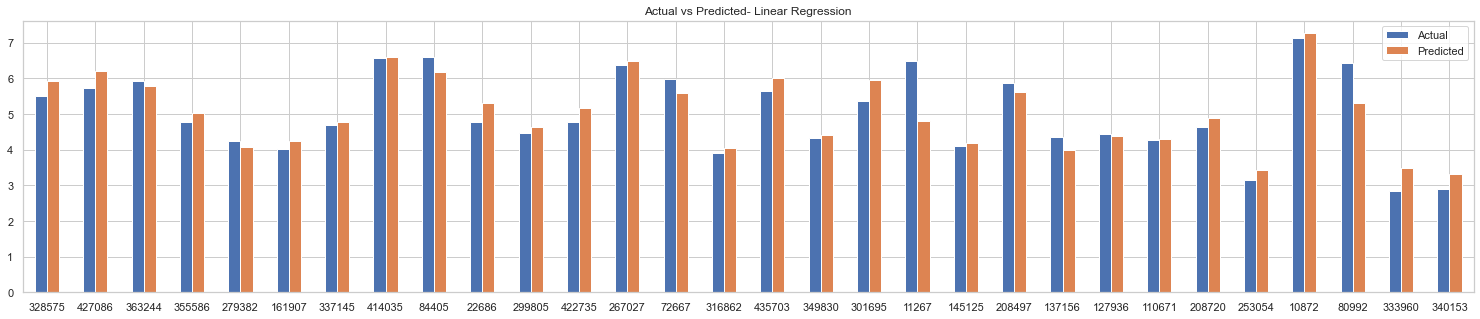

In [128]:
# create a temporary dataframe containing two columns
lin_df_tmp = pd.DataFrame({"Actual": ytrain[:30], "Predicted": lreg_yhat[:30] })

# plot the dataframe
lin_df_tmp.plot(figsize=(26,5), kind="bar", rot=0, title='Actual vs Predicted- Linear Regression' )




Also use a scatter plot to visualize the actual expected loss and predicted expected loss using linear regression model

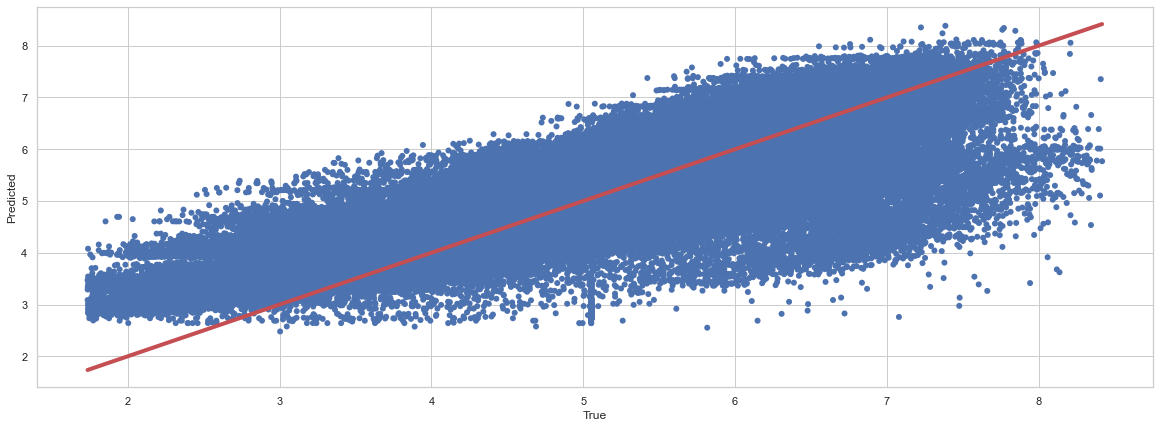

In [129]:
fig, ax = plt.subplots()
ax.scatter(ytrain, lreg_yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('True')
ax.set_ylabel('Predicted')
plt.show()

The values follow the red line, which means they are correctly predicted by the linear regression model

# RANDOM FOREST

In [130]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# specify the hyperparameters and their values
# n_estimators = indicates the number of decision trees used in the random forest model
# max depth = maximum number of levels in the decision trees
# min_samples_Split = Minimum number of samples required to split a node
param_grid = {'n_estimators': [3, 10, 20], 'max_depth': [2, 4, 6, 8, None]}
forest_reg = RandomForestRegressor()

# start a new timer
rf_start=time.time()

# we'll use 10-fold cross-validation with 10 random combinations to try
# we also want to get the train score for later
rf_random_grid_search = RandomizedSearchCV(forest_reg, param_grid, cv=10, n_iter=10, scoring='neg_mean_squared_error', random_state=8, return_train_score=True)

# fit the estimator on the training set
rf_random_grid_search.fit(Xtrain, ytrain)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [2, 4, 6, 8, None],
                                        'n_estimators': [3, 10, 20]},
                   random_state=8, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [131]:
# the best random forest model
best_rf = rf_random_grid_search.best_estimator_
best_rf

RandomForestRegressor(n_estimators=20)

In [132]:
#Use cross-validation to find the average score for this model.
rf_cv_scores= cross_val_score(best_rf, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=10)
rf_cv_rmse_scores = np.sqrt(-rf_cv_scores)
display_scores(rf_cv_rmse_scores)

Scores: [0.39418365 0.40208352 0.39635533 0.39800949 0.39177335 0.39136389
 0.3971661  0.40096362 0.39043858 0.39200631]
Mean: 0.39543438379423246
Standard deviation: 0.003918006883212365


The Random Forest model has on average a RMSE of 0.40, which is a better score compared to the baseline and linear regression models

In [133]:
#training and validation RMSE
val_scores = rf_random_grid_search.cv_results_["mean_test_score"]
train_scores = rf_random_grid_search.cv_results_["mean_train_score"]
params = rf_random_grid_search.cv_results_["params"]
for val_score, train_score, param in zip(val_scores, train_scores, params):
    print(np.sqrt(-val_score), np.sqrt(-train_score), param)

0.6335415626191945 0.632875802390332 {'n_estimators': 3, 'max_depth': 6}
0.4919995649264327 0.4906679474488042 {'n_estimators': 20, 'max_depth': 8}
0.9082224869087041 0.9082012299008883 {'n_estimators': 20, 'max_depth': 2}
0.4168801206489701 0.25284623888249746 {'n_estimators': 3, 'max_depth': None}
0.39877447764019175 0.22766655628144647 {'n_estimators': 10, 'max_depth': None}
0.49191498522076127 0.49062026645463097 {'n_estimators': 10, 'max_depth': 8}
0.632245568413558 0.6316997859550092 {'n_estimators': 10, 'max_depth': 6}
0.9082559190839253 0.9082405099387814 {'n_estimators': 3, 'max_depth': 2}
0.3955287448357813 0.22207081396373743 {'n_estimators': 20, 'max_depth': None}
0.6294097496468065 0.6289133928463613 {'n_estimators': 20, 'max_depth': 6}


In [134]:
# the best model's RMSE
rf_rmse_score=np.sqrt(-rf_random_grid_search.best_score_)
print(f'The best Random Forest model has a RMSE of: {rf_rmse_score}')

The best Random Forest model has a RMSE of: 0.3955287448357813


In [135]:
# make predictions
rf_yhat = best_rf.predict(Xtrain)

# Calculate how much time it took to tune the hyperparameters and train the model
rf_duration = time.time() - rf_start
print(f'The Random Forest model took {rf_duration:.3f} seconds')

The Random Forest model took 3657.367 seconds


<AxesSubplot:title={'center':'Actual vs Predicted- Random Forest'}>

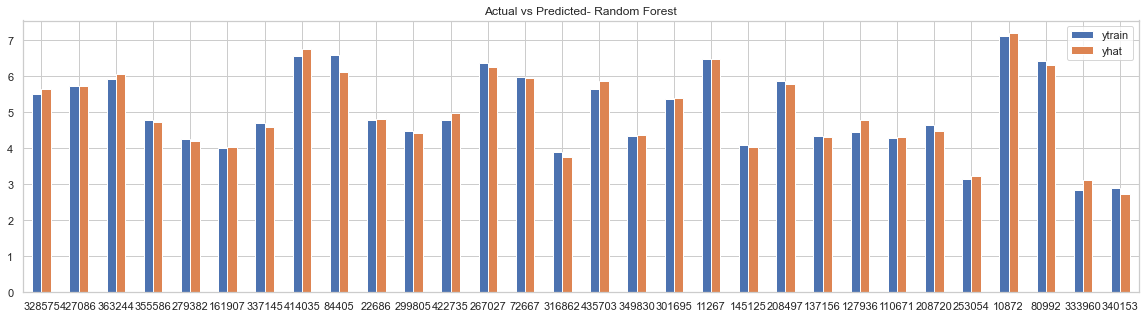

In [136]:
# create a temporary dataframe containing two columns
rf_df_tmp = pd.DataFrame({"ytrain": ytrain[:30], "yhat": rf_yhat[:30]})
# plot the dataframe
rf_df_tmp.plot(figsize=(20,5), kind="bar", rot=0,title = 'Actual vs Predicted- Random Forest' )

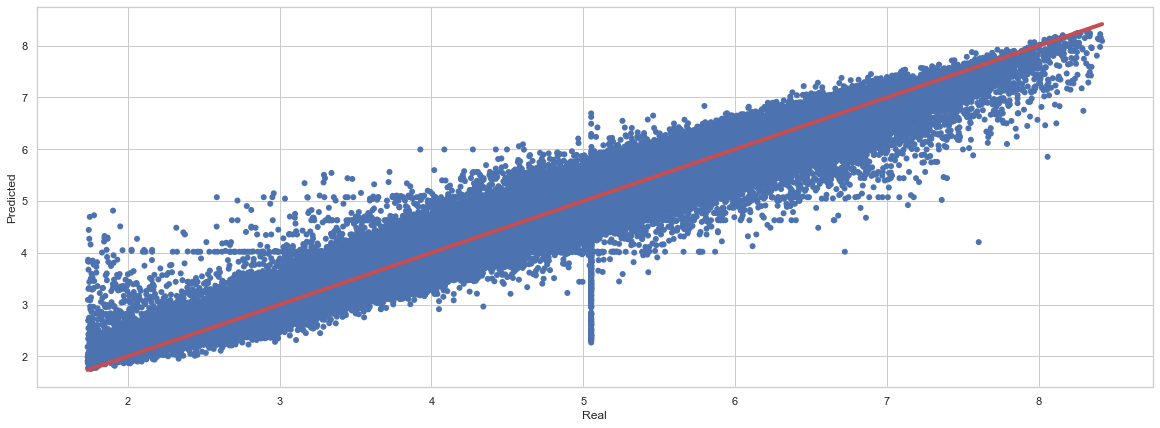

In [137]:
fig, ax = plt.subplots()
ax.scatter(ytrain, rf_yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In [138]:
import os
from joblib import dump

# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")

# save the rf model
dump(best_rf, 'models/rf_reg.joblib')

['models/rf_reg.joblib']

# SUPPORT VECTOR REGRESSOR

In [ ]:
#Tune the hyperparameters for the Support Vector Regressor with GridSearch.

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_param_grid = [
{'C': [1.0, 10, 100,10000],
'gamma': ["scale", "auto", 0.01, 0.1, 1, 3, 5, 10]
},
]
svr = SVR(kernel="rbf")

# start a new timer
svr_start = time.time()

#10 fold cross_validation and access to train score for later
sv_random_search = RandomizedSearchCV(svr, svr_param_grid, cv=10, scoring='neg_mean_squared_error',
return_train_score=True)

# fit the best model and hyperparameters to the training set
sv_random_search.fit(Xtrain, ytrain)

In [ ]:
#Best svr model
best_sv = sv_random_search.best_estimator_
best_sv

In [ ]:
#Use cross-validation to find the scores
sv_cv_scores= cross_val_score(best_sv, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=10)
sv_cv_rmse_scores = np.sqrt(-sv_cv_scores)
display_scores (sv_cv_rmse_scores)

The Support Vector Regression model has on average a RMSE of 0.3779, which is the worst accuracy score compared to the other models but
better than the baseline.

In [ ]:
#training and validation the SVR RMSE
val_scores = sv_grid_search.cv_results_["mean_test_score"]
train_scores = sv_grid_search.cv_results_["mean_train_score"]
params = sv_grid_search.cv_results_["params"]
for val_score, train_score, param in zip(val_scores, train_scores, params):
print(np.sqrt(-val_score), np.sqrt(-train_score), param)

The best model does not show overfitting or underfitting because the performances on the training and validation sets are roughly similar.

In [ ]:
# Best model RMSE
sv_rmse_score=np.sqrt(-sv_grid_search.best_score_)
print(f'The best SVR model has a RMSE of: {sv_rmse_score}')

In [ ]:
# make predictions
svr_yhat = best_sv.predict(Xtrain)

# Calculate how much time it took to tune the hyperparameters and train the model
svr_duration = time.time() - svr_start
print(f'The SVR model took {svr_duration:.3f} seconds')

In [ ]:
# create a temporary dataframe containing two columns
svr_df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "yhat": svr_yhat[:50]})
# plot the dataframe
svr_df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(ytrain, svr_yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
# Save the model
dump(best_sv, 'models/sv_reg.joblib')

# Adaboost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adb_reg=AdaBoostRegressor()
adb_param_grid = {'n_estimators': [3, 10, 20, 50], 'learning_rate': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75,
1],
'loss' : ['linear', 'square', 'exponential']}
adb_reg=AdaBoostRegressor(random_state=8)
#start a new timer
adb_start = time.time()
# we'll use 10-fold cross-validation and want to have access to the train score
adb_random_grid_search = RandomizedSearchCV(adb_reg, adb_param_grid, cv=10, n_iter=10,
scoring='neg_mean_squared_error', random_state=8, return_train_score=T
rue)
#fit the best model and hyperparameters to the training dataset
adb_random_grid_search.fit(Xtrain, ytrain)

In [ ]:
# the best model
best_adb = adb_random_grid_search.best_estimator_
best_adb

In [ ]:
#Cross-validation to find the average accuracy score for this model.
adb_cv_scores= cross_val_score(best_adb, Xtrain, ytrain, scoring="neg_mean_squared_error", cv=10)
adb_cv_rmse_scores = np.sqrt(-adb_cv_scores)
display_scores(adb_cv_rmse_scores)

On average, the AdaBoost model has an accuracy rate of 0.3764, which is our best RMSE among the models.

In [ ]:
# training and validation RMSE
adb_val_scores = adb_random_grid_search.cv_results_["mean_test_score"]
adb_train_scores = adb_random_grid_search.cv_results_["mean_train_score"]
adb_params = adb_random_grid_search.cv_results_["params"]
for adb_val_score, adb_train_score, adb_param in zip(adb_val_scores, adb_train_scores, adb_params):
print(np.sqrt(-adb_val_score), np.sqrt(-adb_train_score), param)

The model has a rmse on the validation set slightly higher than on the training set. But they are still similar.

In [ ]:
#RMSE score
adb_rmse_score = np.sqrt(-adb_random_grid_search.best_score_)
print(f'The best Adaboost model has a RMSE of: {adb_rmse_score}')

In [ ]:
# make predictions
adb_yhat = best_adb.predict(Xtrain)
# Calculate how much time it took to tune the hyperparameters and train the model
adb_duration = time.time() - adb_start
print(f'The Adaboost model took {adb_duration:.3f} seconds')

In [ ]:
# create a temporary dataframe containing two columns
adb_df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "yhat": adb_yhat[:50]})
# plot the dataframe
adb_df_tmp.plot(figsize=(12,5), kind="bar", rot=0, title= "Comparative Analysis- AdaBoost Model")

In [ ]:
fig, ax = plt.subplots()
ax.scatter(ytrain, adb_yhat, edgecolors='None')
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
#Save the model
dump(best_adb, 'models/adv_reg.joblib')

# Model Comparison

In [ ]:
print(f'Decision Trees: {dt_duration:.3f} seconds')
print(f'Random Forest: {rf_duration:.3f} seconds')
print(f'Support Vector Machine Regressor: {svr_duration:.3f} seconds')
print(f'Adaboost: {adb_duration:.3f} seconds')

In [ ]:
#Print Cross-validation scores
print('Linear Regression')
display_scores(rmse_lin_scores)
print('')
print('Decision Trees')
display_scores(dt_cv_rmse_scores)
print('')
print('Random Forest')
display_scores(rf_cv_rmse_scores)
print('')
print('Support Vector Regression')
display_scores(sv_cv_rmse_scores)
print('')
print('AdaBoost')
display_scores(adb_cv_rmse_scores)

Following the cross-validation, on average, the Decision Tree and the Support Vector Regression models have the worst accuracy scores. Even
though the linear regression model and the Random Forest models have similar RMSE, the latter has a lower variance/standard deviation. The
model with the best rmse is the AdaBoost.

# MODELS VS BASELINE

In [ ]:
RMSE= {'Baseline RMSE'         : [baseline_rmse],
       'Linear Regression'     : [rmse_lin_scores.mean()],
       'Random Forest'         : [rf_rmse_score],
       'Support Vector Machine': [sv_rmse_score]
       'Adaboost'              : [adb_rmse_score]
      }
scores_df= pd.Dataframe(RMSE). transpose()
scores_df.columns['RMSE']
scores_df["vs Baseline"]= 100*(baseline_rmse-scores_df["RMSE"]/baseline_rmse)

# TESTSET MODEL EVALUATION